# Bank Marketing Campaign
***
## Marketing Introduction:
*The process by which companies create value for customers and build strong customer relationships in order to capture value from customers in return.*


***

**Marketing campaigns** are characterized by  focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign. <br>

1) Target Audience: Identifying the specific group within the population that the marketing campaign aims to reach and understanding the rationale behind this choice. This crucial aspect ensures that the campaign's message is directed towards the most receptive segment of the population.<br><br>

2) Distribution Channels: Determining the most efficient methods for delivering the marketing message to the target audience. This involves selecting appropriate channels, such as telephones, radio, TV, or social media, based on the characteristics of the target population and the campaign objectives.<br><br>

3) Pricing Strategy: Evaluating the optimal pricing approach to attract potential clients. While less relevant for a bank's campaign focused on attracting deposit account holders, pricing considerations may still apply in certain contexts to support the overall campaign objectives.<br><br>

4) Promotional Tactics: Planning the execution of the campaign and defining how potential clients will be engaged. This phase typically follows a thorough analysis of past campaigns to learn from mistakes and identify opportunities for improvement, ultimately aiming to enhance the effectiveness of the marketing efforts.<br><br>

# What is a Term Deposit? 
A **Term deposit** is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.


# Attributes Description: <br>

Input variables:<br>
##  Bank client data:<br>
<a id="bank_client_data"></a>
1 - **age:** (numeric)<br>
2 - **job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - **marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - **education:** (categorical: primary, secondary, tertiary and unknown)<br>
5 - **default:** has credit in default? (categorical: 'no','yes','unknown')<br>
6 - **housing:** has housing loan? (categorical: 'no','yes','unknown')<br>
7 - **loan:** has personal loan? (categorical: 'no','yes','unknown')<br>
8 - **balance:** Balance of the individual.
##  Related with the last contact of the current campaign:
<a id="last_contact"></a>
8 - **contact:** contact communication type (categorical: 'cellular','telephone') <br>
9 - **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - **day:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
## Other attributes:<br>
<a id="other_attributes"></a>
12 - **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - **previous:** number of contacts performed before this campaign and for this client (numeric)<br>
15 - **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

Output variable (desired target):<br>
21 - **y** - has the client subscribed a term deposit? (binary: 'yes','no')

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

df = pd.read_csv('bank.csv')
term_deposits = df.copy()
# Have a grasp of how our data looks.
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

### Cleaning-up and constructing the data set

We remove the ninth column (availability of the contact of a person in the dataset), as the corresponding features are not of interest to us.

In [14]:
# use the drop() function in panda, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
# argument 'inplace=True' to permanently remove the column
df.drop(['contact'],axis=1,inplace=True)
df.head()
print(df.shape)

(11162, 16)


In [15]:
df.head()

age         job  marital  education default  balance housing loan  day  \
0   59      admin.  married  secondary      no     2343     yes   no    5   
1   56      admin.  married  secondary      no       45      no   no    5   
2   41  technician  married  secondary      no     1270     yes   no    5   
3   55    services  married  secondary      no     2476     yes   no    5   
4   54      admin.  married   tertiary      no      184      no   no    5   

  month  duration  campaign  pdays  previous poutcome deposit  
0   may      1042         1     -1         0  unknown     yes  
1   may      1467         1     -1         0  unknown     yes  
2   may      1389         1     -1         0  unknown     yes  
3   may       579         1     -1         0  unknown     yes  
4   may       673         2     -1         0  unknown     yes


## Summary:
***
<ul>
<li type="square"> <b>Mean Age</b> is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)</li><br>
<li type="square"> The <b>mean balance</b> is 1,528. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.</li><br>
<li type="square">As the data information said it will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. Also, <b>duration is obtained after the call is made to the potential client</b> so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit  is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client. </li><br>
</ul>

**Note: There are not that much insights we can gain from the descriptive dataset since most of our descriptive data is located not in the "numeric" columns but in the "categorical columns".**


In [16]:
df.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

Fortunately, there are no <b>missing values</b>. If there were missing values we will have to fill them with the median, mean or mode. This will definitely make it easier for us.

In [17]:
# To check there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


In [458]:
print('Data columns with null values:',df.isnull().sum(), sep = '\n')

Data columns with null values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


We observe that we do not have any null values in the data.

We next randomly split the data into train and test sets, before conducting any analysis, as such an analysis will be based on the train set only.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

fraction_train = 0.8 
fraction_test = 1.0 - fraction_train
df_train, df_test = train_test_split(df, train_size = fraction_train, test_size = fraction_test)
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8929 entries, 765 to 8470
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8929 non-null   int64 
 1   job        8929 non-null   object
 2   marital    8929 non-null   object
 3   education  8929 non-null   object
 4   default    8929 non-null   object
 5   balance    8929 non-null   int64 
 6   housing    8929 non-null   object
 7   loan       8929 non-null   object
 8   day        8929 non-null   int64 
 9   month      8929 non-null   object
 10  duration   8929 non-null   int64 
 11  campaign   8929 non-null   int64 
 12  pdays      8929 non-null   int64 
 13  previous   8929 non-null   int64 
 14  poutcome   8929 non-null   object
 15  deposit    8929 non-null   object
dtypes: int64(7), object(9)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 2819 to 3919
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 


# Exploratory Data Analysis

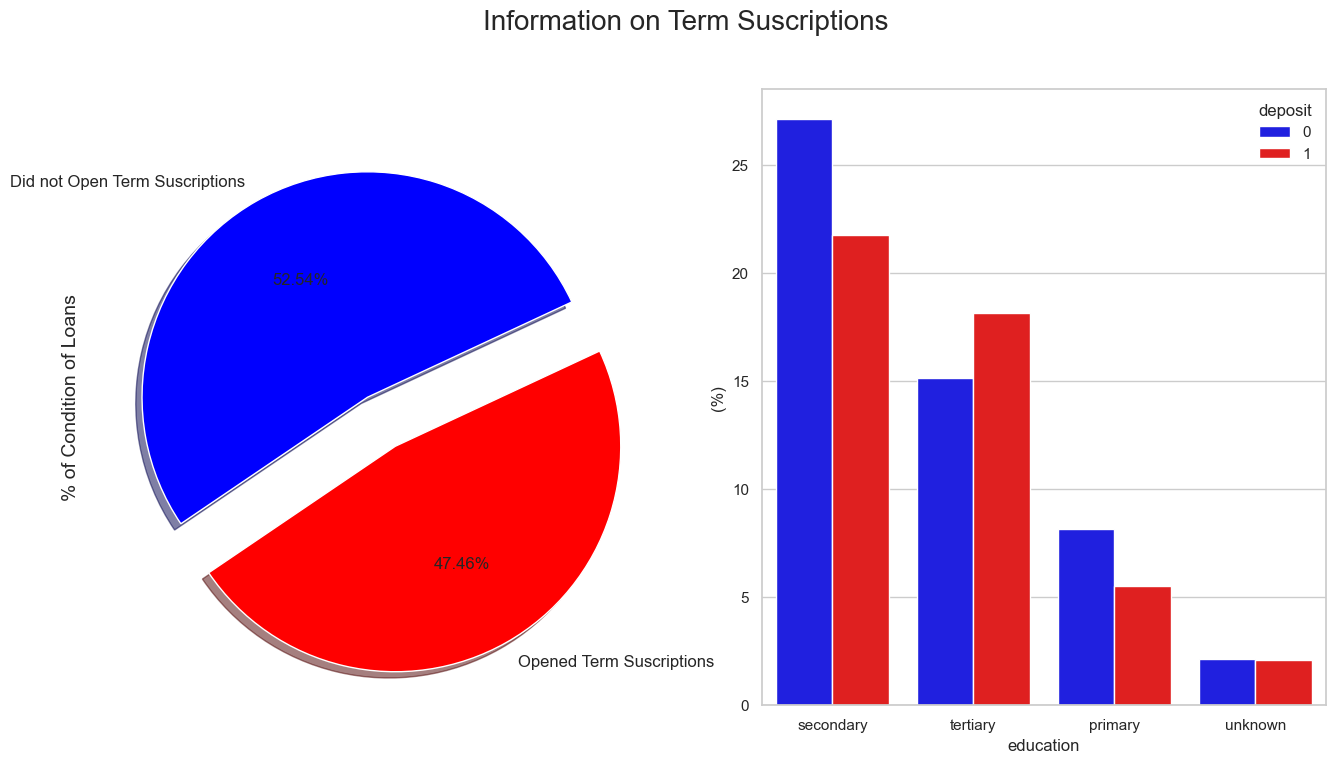

In [421]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["blue", "red"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df_train["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["blue", "red"]

sns.barplot(x="education", y="balance", hue="deposit", data=df_train, palette=palette, estimator=lambda x: len(x) / len(df_train) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

From the above plots we can see the interdependence of term subscriptions with the education column. The individuals with 'secondary' level of education have a higher likelihood of opening the term subscriptions followed by people with 'tertiary', 'primary' and 'unknown' level of eduction.  This code creates a grouped bar plot showing the distribution of 'balance' among different levels of 'education', with separate bars for customers who made a deposit (deposit="yes") and those who did not (deposit="no"). The height of each bar represents the percentage of customers in each category.

#### Let us now see how the numeric data is distributed.

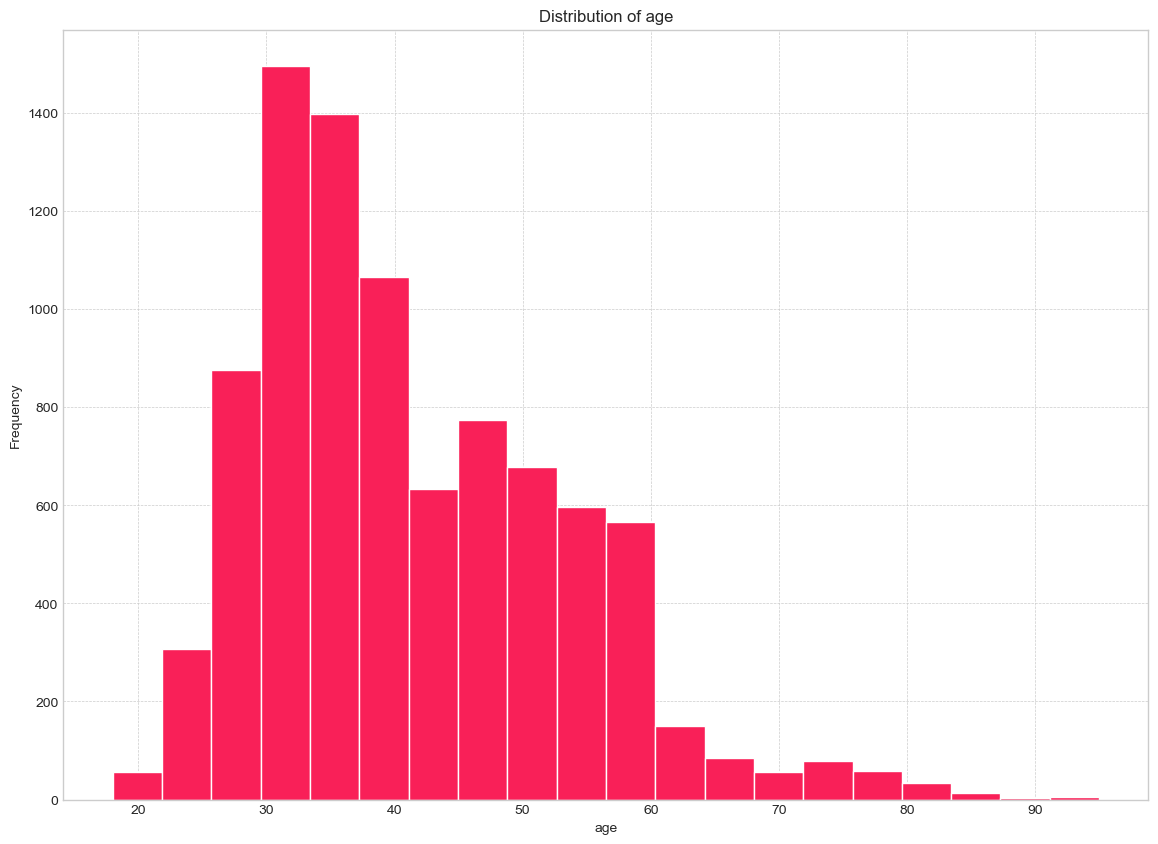

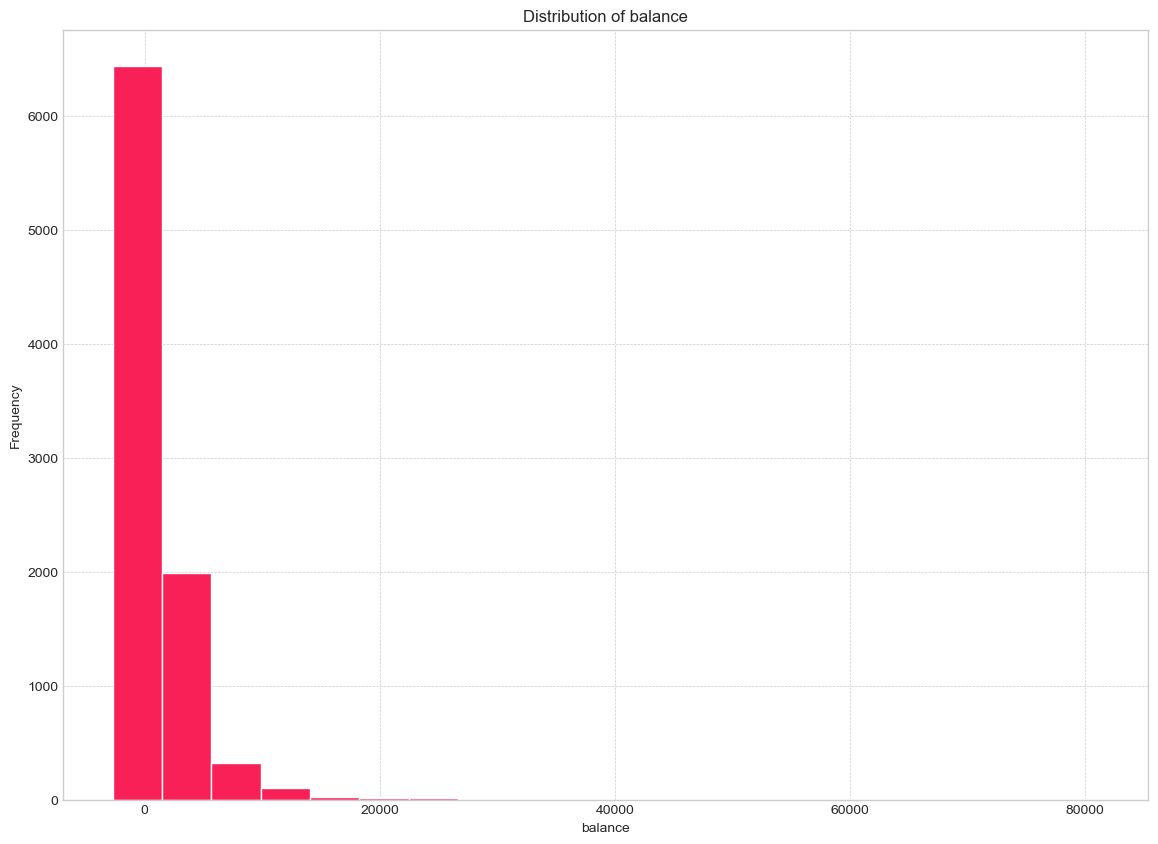

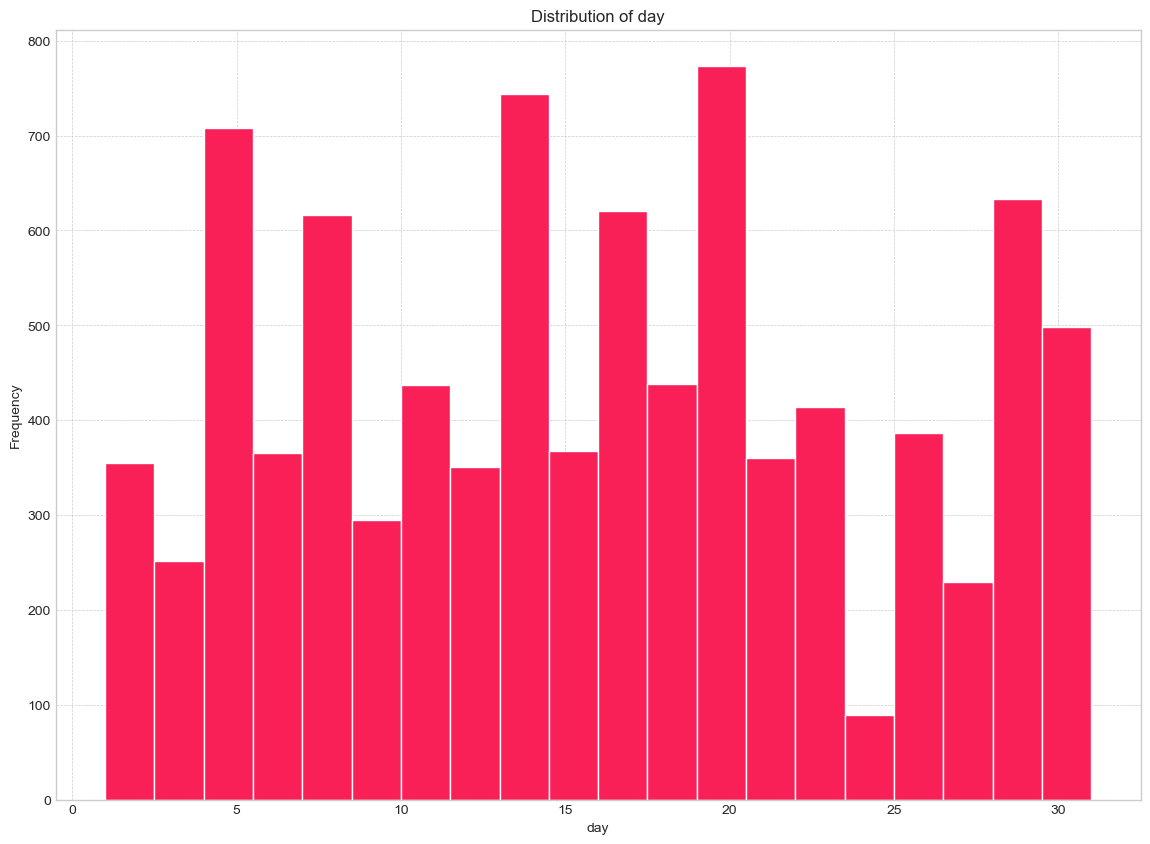

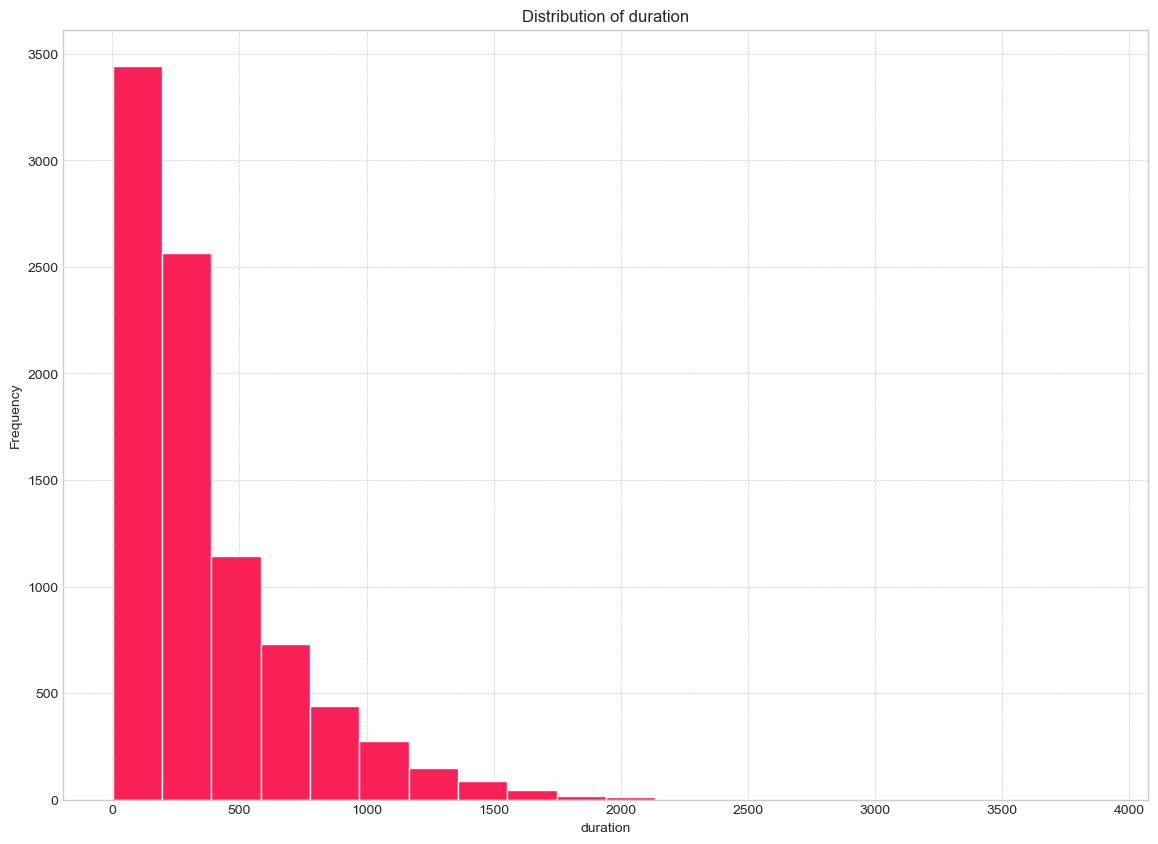

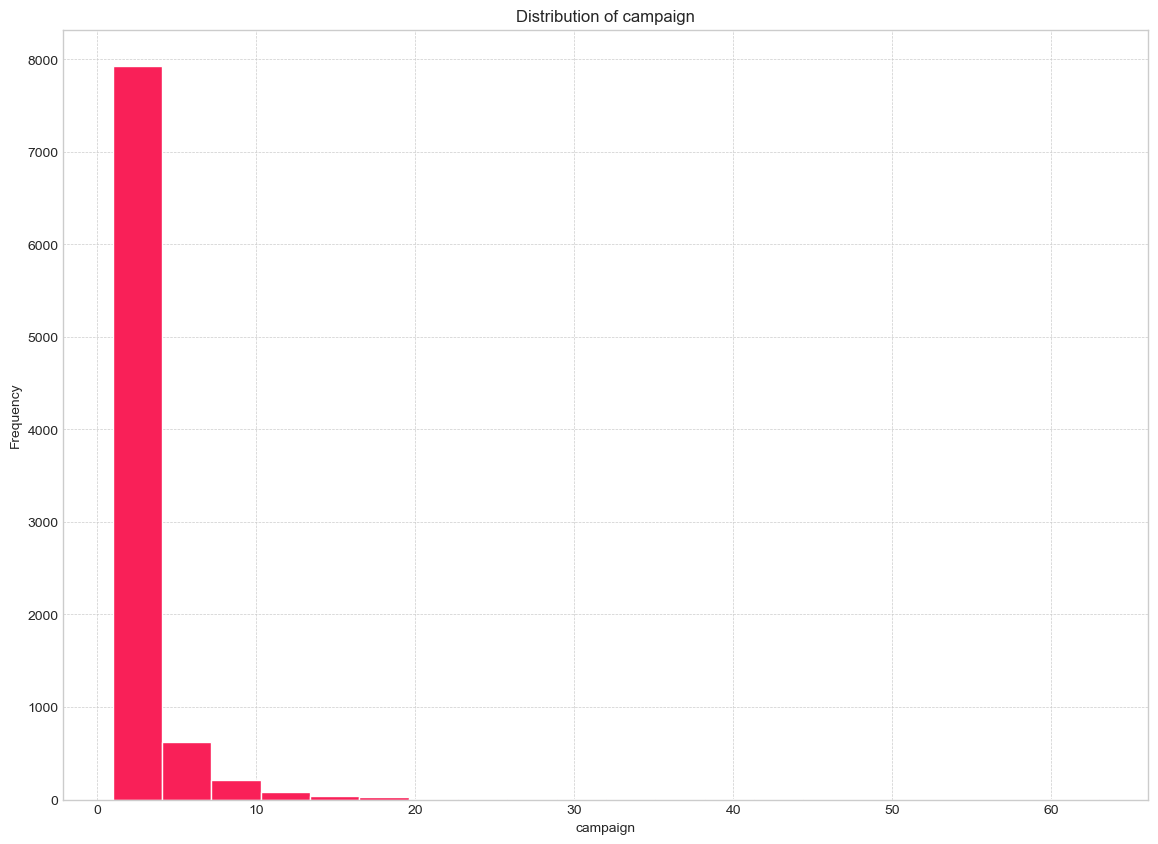

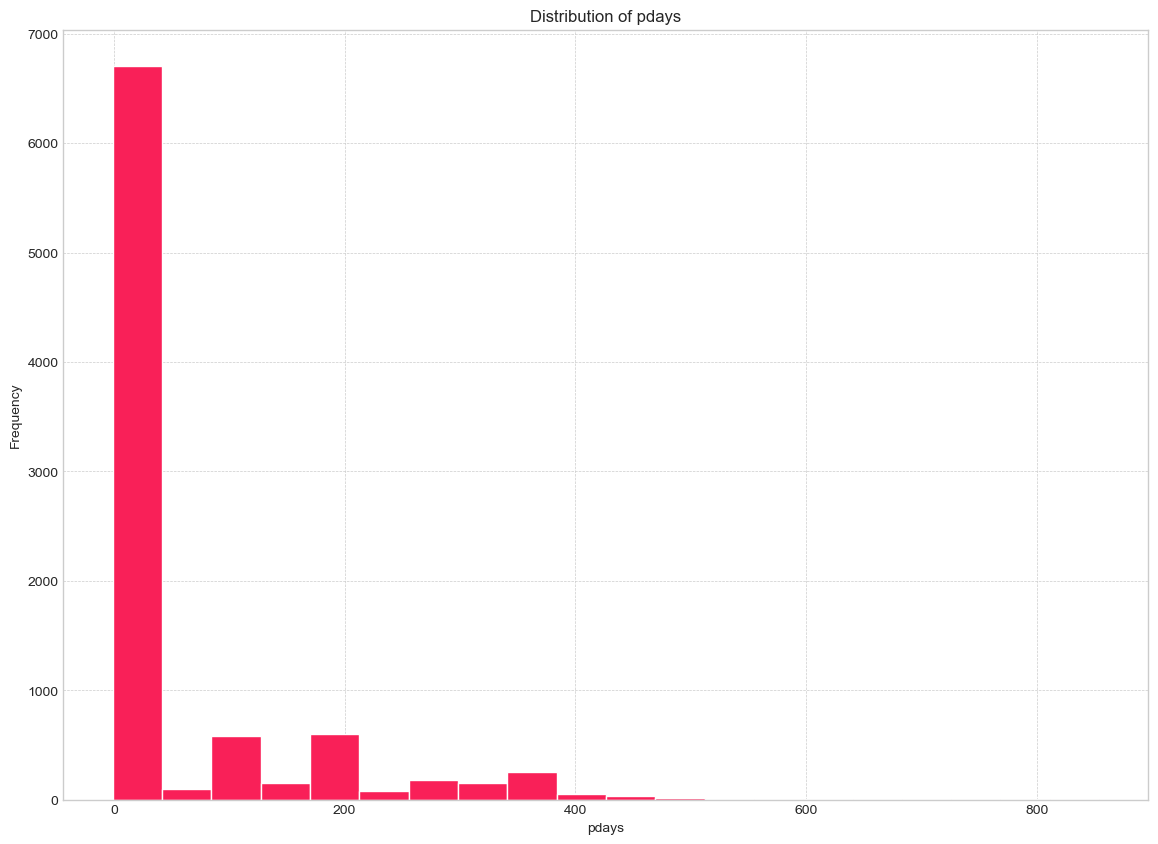

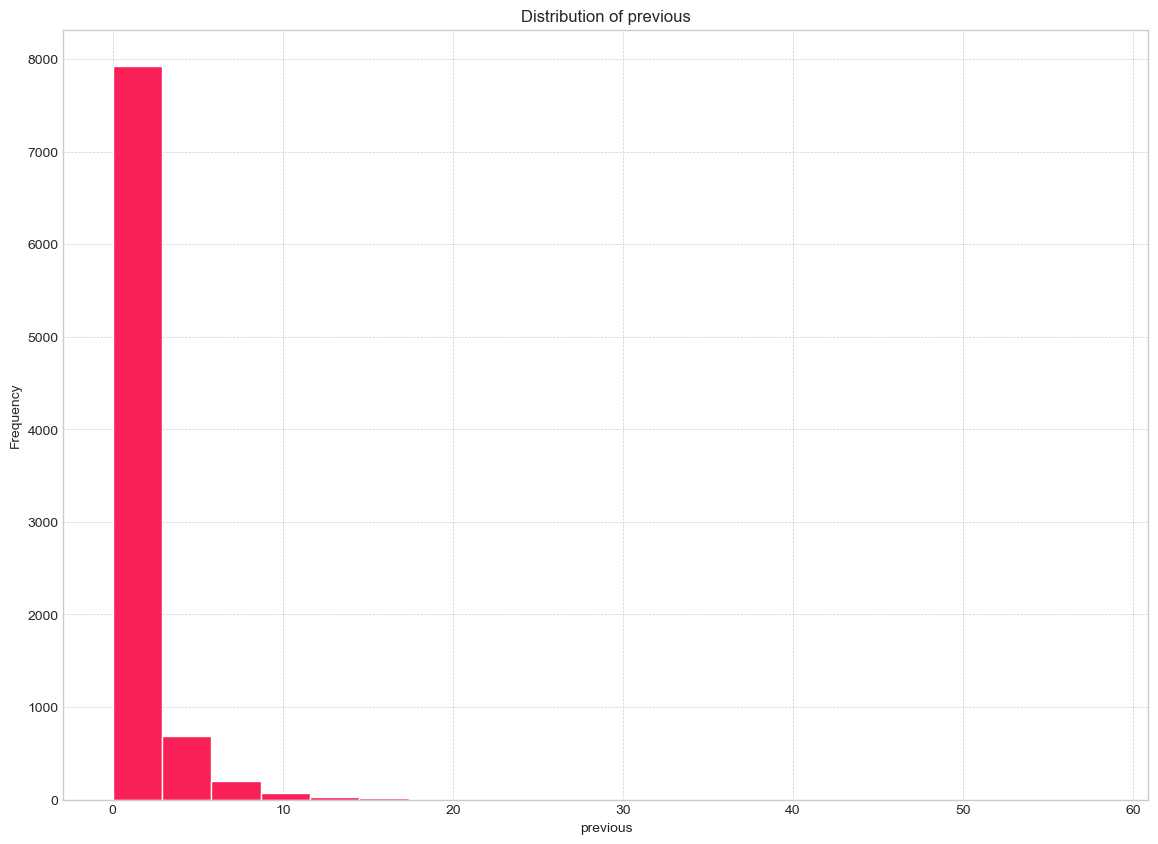

In [35]:
import matplotlib.pyplot as plt

# Plot each numeric column separately with seaborn style
for column in df_train.select_dtypes(include='number'):
    plt.figure(figsize=(14, 10))
    plt.hist(df_train[column], bins=20, color='#F92058')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', linewidth=0.5)  # Add grid lines
    plt.show()

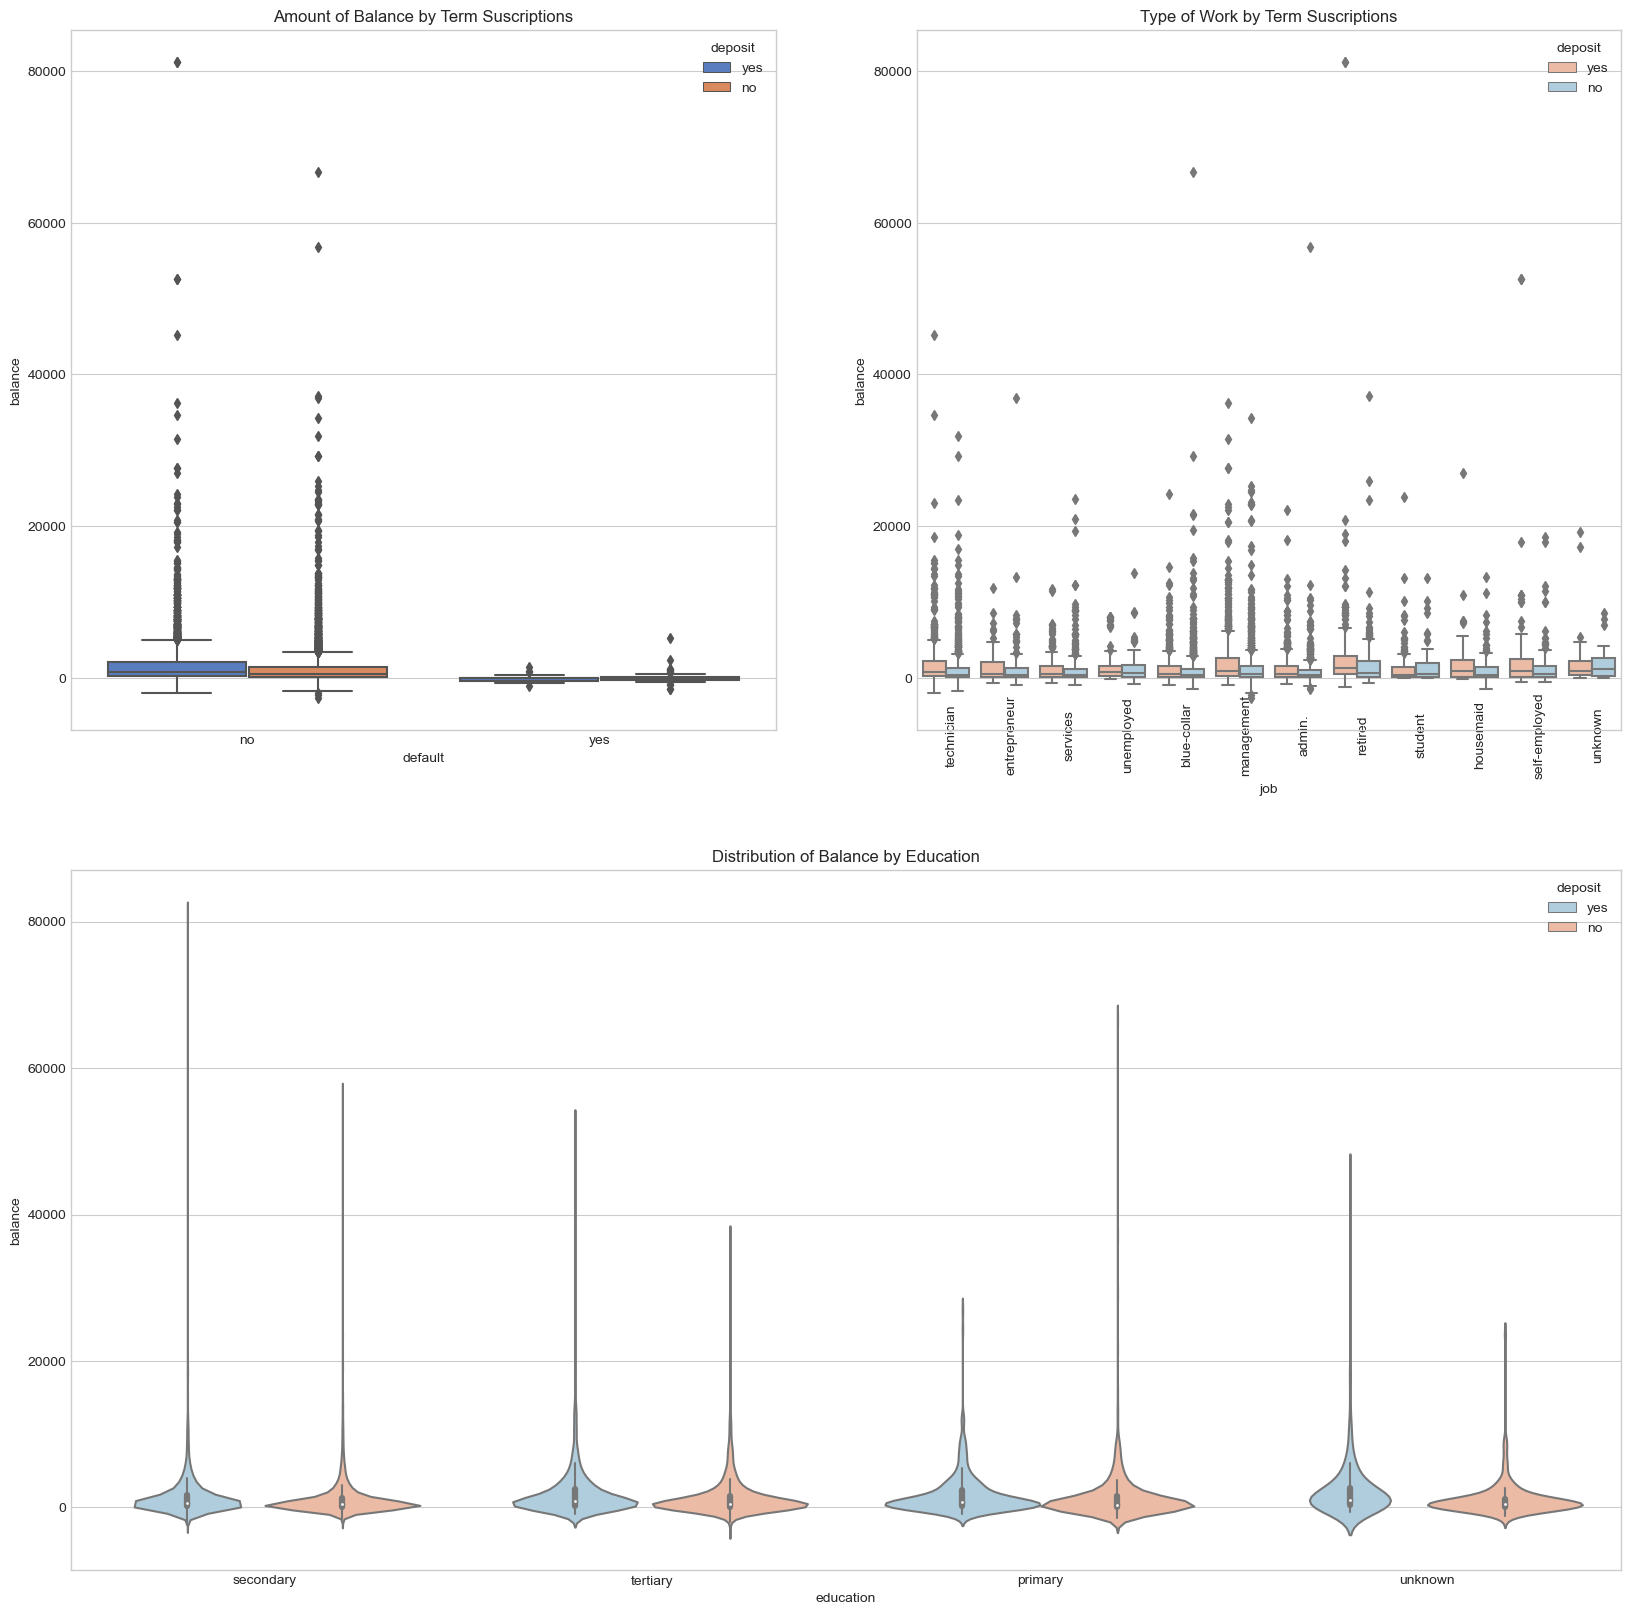

In [37]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=df_train, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df_train["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=df_train, palette="RdBu", ax=ax2)

g1.set_xticklabels(df_train["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=df_train, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

<h3> Analysis by Occupation: </h3>
<ul> 
    <li> <b> Number of Occupations: </b>  Management is the occupation that is more prevalent in this dataset.</li>
    <li><b>Age by Occupation: </b>  As expected, the retired are the ones who have the highest median age while student are the lowest.</li>
    <li><b> Balance by Occupation: </b> Management,Self-Employed and Retirees are the ones who have the highest balance in their accounts. </li>
    </ul>

In [406]:
# Drop the Job Occupations that are "Unknown"
df_1 = df_train.drop(df_train.loc[df["job"] == "unknown"].index)

# Admin and management are basically the same let's put it under the same categorical value
lst = [df_1]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"

In [407]:
df_1.shape

(8870, 16)

In [422]:
# Let us have a look at the distribution of ages by occupation
suscribed_df = df_1.loc[df["deposit"] == "yes"]

occupations = df_1["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

The median age of retired people is the highest while that of students is the lowest.

### Marital Status 
Let us now have a look at the influence of marital status on the balances of individuals.

In [409]:
df_1['marital'].value_counts()

marital
married     5016
single      2810
divorced    1044
Name: count, dtype: int64

In [410]:
vals = df_1['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

data = [go.Bar(
            x=labels,
            y=vals,
    marker=dict(
    color="#FE9A2E")
    )]

layout = go.Layout(
    title="Count by Marital Status",
)

fig = go.Figure(data=data, layout=layout)



iplot(fig, filename='basic-bar')

In [414]:
# Distribution of Balances by Marital status
single = df_1['balance'].loc[df_1['marital'] == 'single'].values
married = df_1['balance'].loc[df_1['marital'] == 'married'].values
divorced = df_1['balance'].loc[df_1['marital'] == 'divorced'].values


single_dist = go.Histogram(
    x=single,
    histnorm='density', 
    name='single',
    marker=dict(
        color='#6E6E6E'
    )
)


married_dist = go.Histogram(
    x=married,
    histnorm='density', 
    name='married',
    marker=dict(
        color='#2E9AFE'
    )
)

divorced_dist = go.Histogram(
    x=divorced,
    histnorm='density', 
    name='divorced',
    marker=dict(
        color='#FA5858'
    )
)


fig = tools.make_subplots(rows=3, print_grid=False)

fig.append_trace(single_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)


fig['layout'].update(showlegend=False, title="Price Distributions by Marital Status",
                    height=1000, width=800)

iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

Here we notice that the divorced have a considerably less amount of balance when compared to the married and single people.

In [416]:
fig = ff.create_facet_grid(
    df_1,
    x='duration',
    y='balance',
    color_name='marital',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'}
)

iplot(fig, filename='facet - custom colormap')


Even though the divorced people have a low balance, if we drop the columns with marital status being divorced, we might skip some important customers in this category with high balances as seen in the scatter plot above.

C:\Users\ayraa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



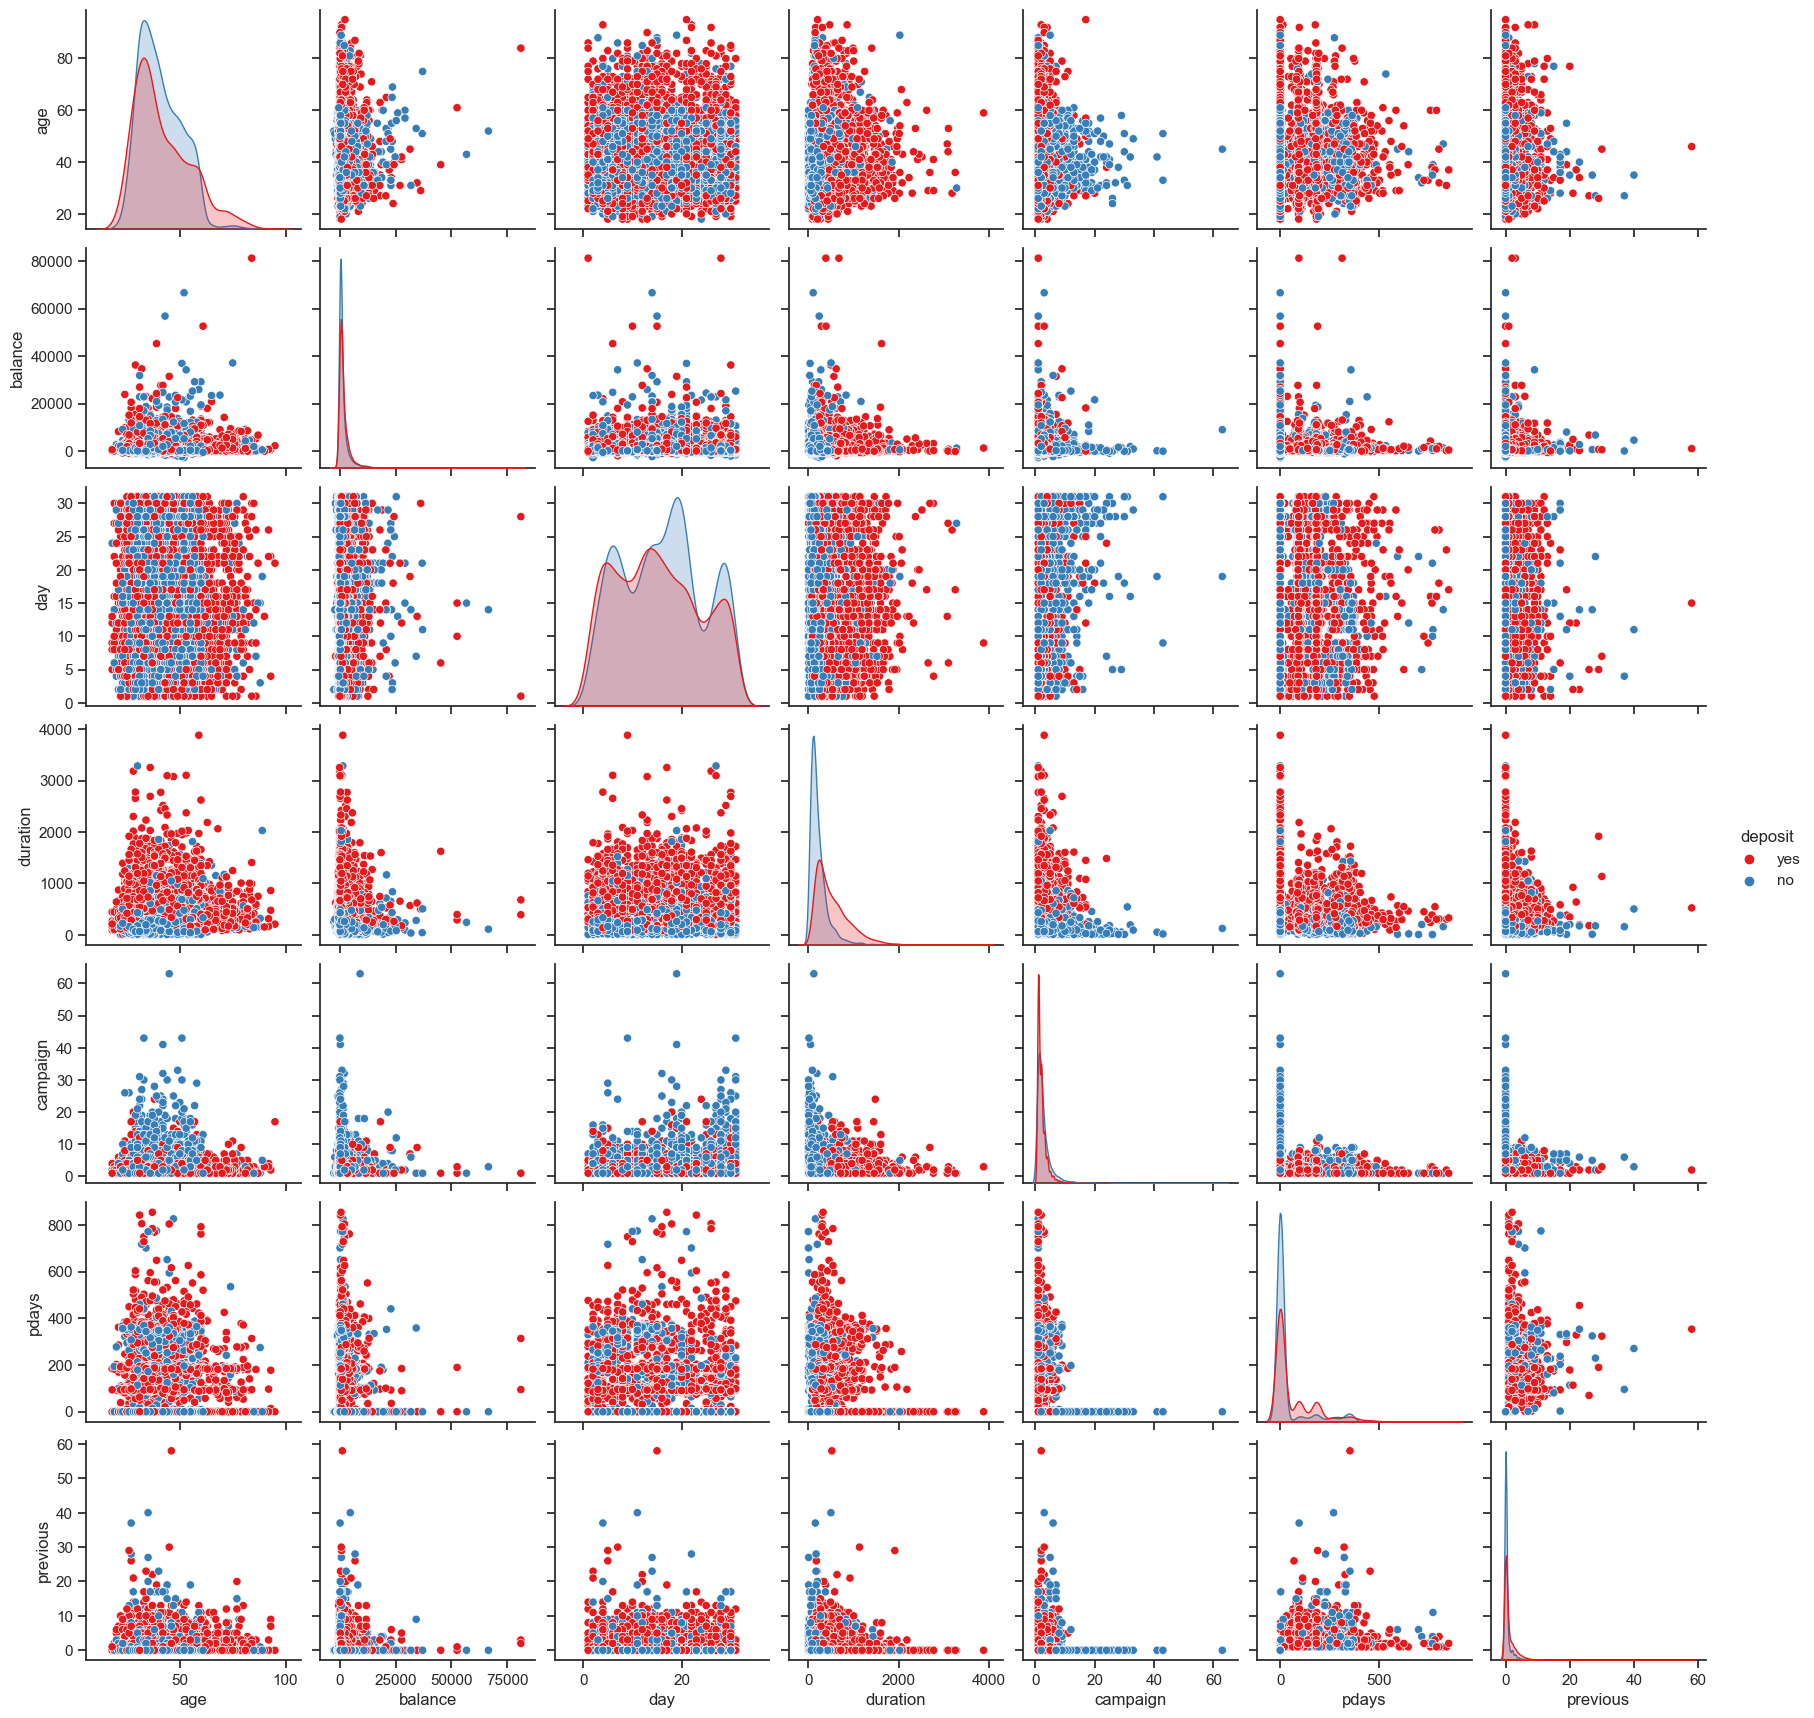

In [417]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df_1, hue="deposit", palette="Set1")
plt.show()

<h3><b>Observations:</b> </h3>
<ul>
    <li><b>Campaign Duration:</b> We observe that duration has a high correlation with term deposits meaning the higher the duration, the more likely it is for a client to open a term deposit.  </li>

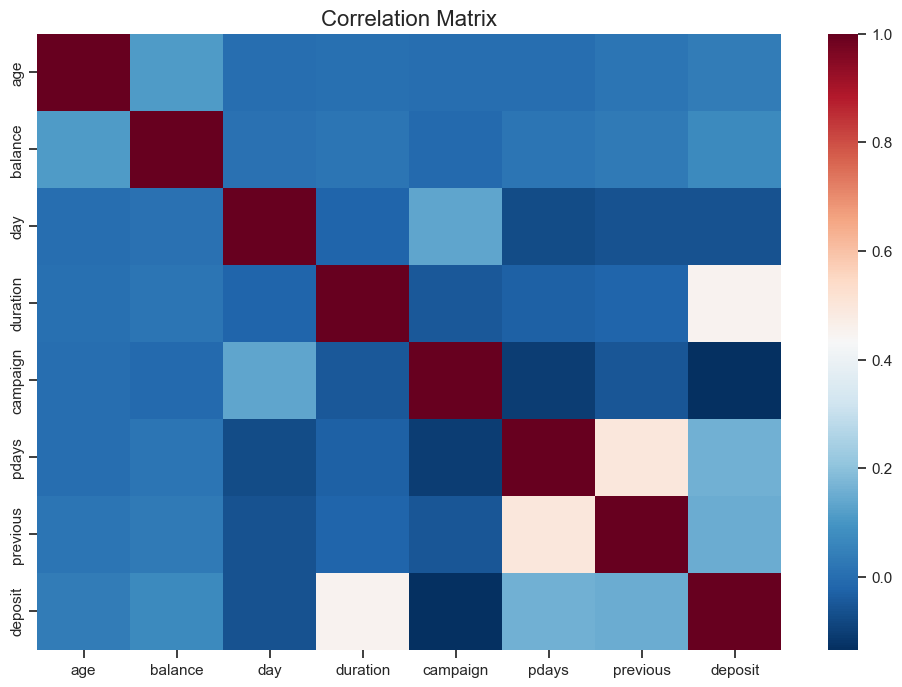

In [418]:
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df_2=df_train
df_2['deposit'] = LabelEncoder().fit_transform(df_2['deposit'])



# Separate both dataframes into 
numeric_df = df_2.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

We notice that "duration" has the highest correlation with "deposit". This means that the more a person has been talked to, the more likely it is for him to have a term subscription.

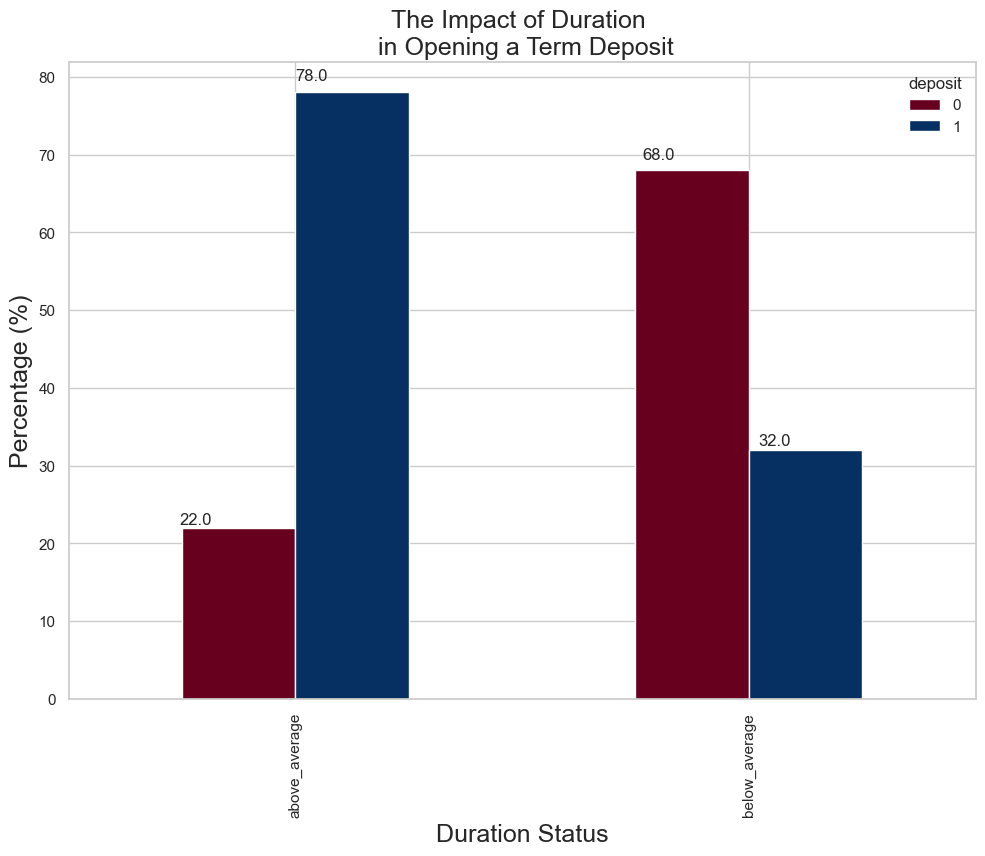

In [419]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df_2['duration'].mean()

lst = [df_2]
df_2["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df_2['duration_status'], df_2['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

We observe that 78% of the people whose "duration" is above the average have opened a term deposit while 68% of those whose "duration" is below average have not opened a term deposit. This makes it clear that there is a strong correlation between "duration" and "deposit".

In [461]:
import plotly.express as px

fig = px.box(df_train, x="job", y="duration", color="deposit")
fig.update_traces(boxmean=True)  # This is to show the mean line inside the box plot
fig.show()


### Observations
1) The individuals who have not made a deposit have lesser duration on calls.<br><br>
2) Comparing the average, the blue collar and entrepreneur have high duration in calls, while students and retired individuals have less duration on average.<br><br>
3) There is a large distribution of individuals from self-employed clients and management people.

## Handling Outliers

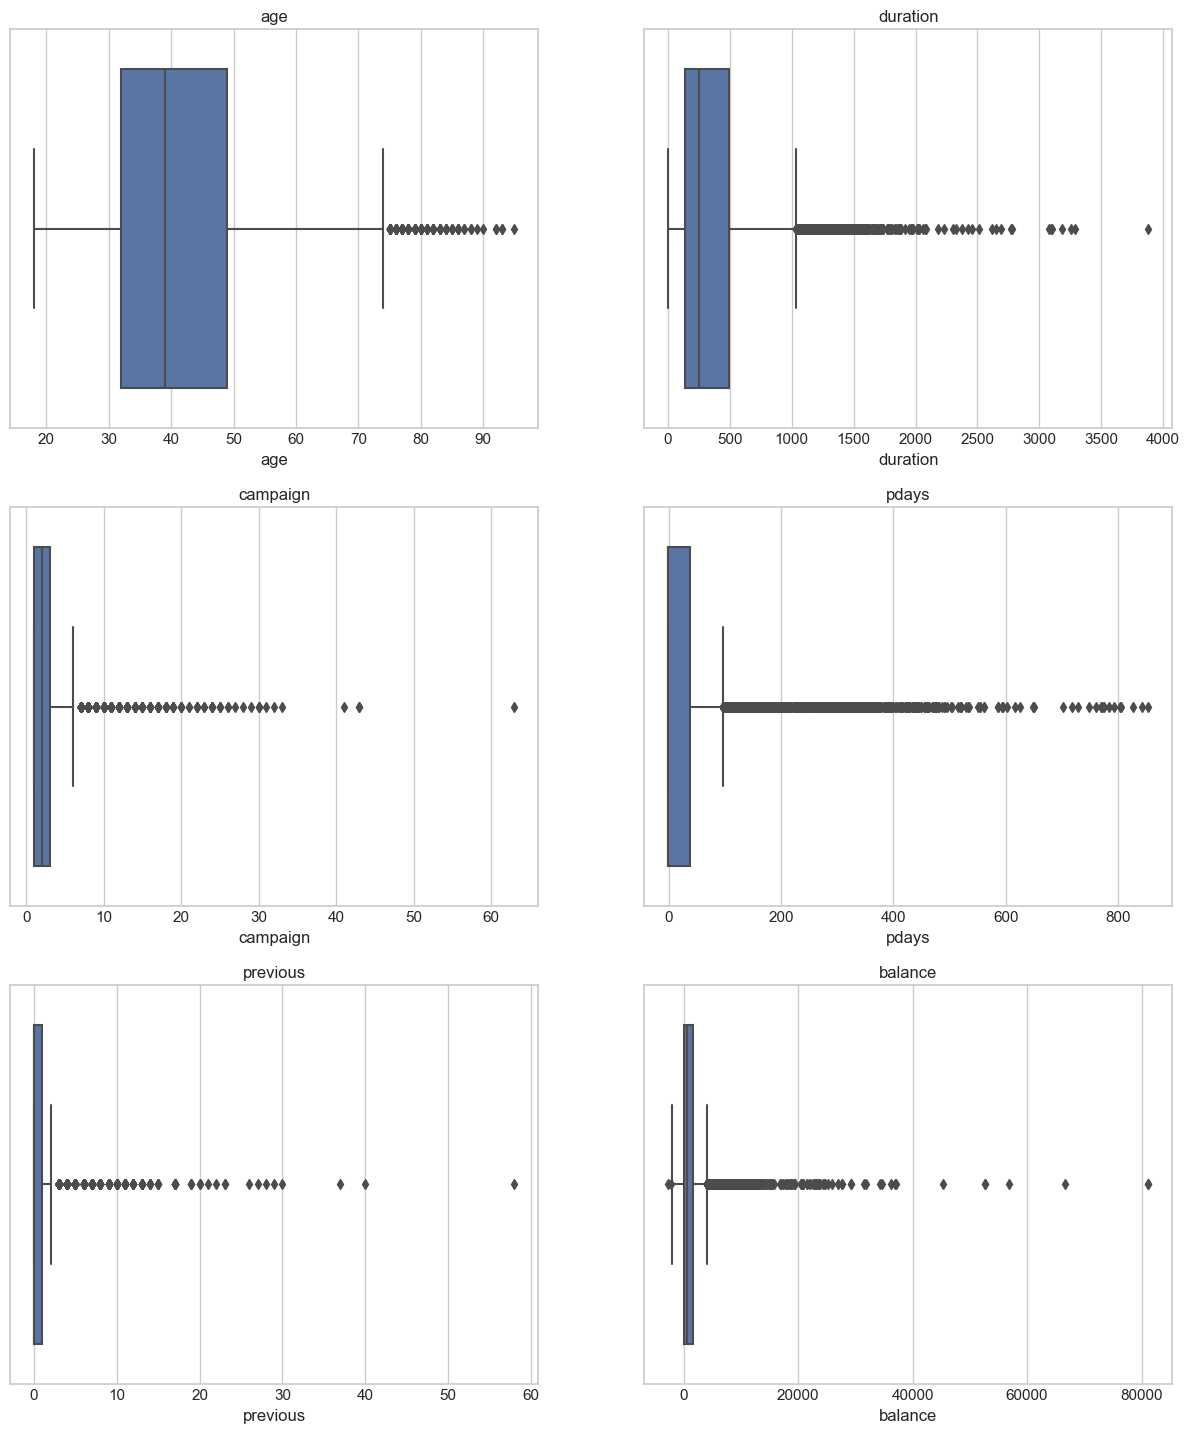

In [466]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 30))

# Set seaborn style
sns.set_style("whitegrid")

# Create subplots
ax = plt.subplot(521)
sns.boxplot(x=df_train['age'], ax=ax)
ax.set_title('age')

ax = plt.subplot(522)
sns.boxplot(x=df_train['duration'], ax=ax)
ax.set_title('duration')

ax = plt.subplot(523)
sns.boxplot(x=df_train['campaign'], ax=ax)
ax.set_title('campaign')

ax = plt.subplot(524)
sns.boxplot(x=df_train['pdays'], ax=ax)
ax.set_title('pdays')

ax = plt.subplot(525)
sns.boxplot(x=df_train['previous'], ax=ax)
ax.set_title('previous')

ax = plt.subplot(526)
sns.boxplot(x=df_train['balance'], ax=ax)
ax.set_title('balance')

plt.show()


We see that most features have many outliers except for age,previous and campaign. So, let's fix only those features using IQR method.

In [467]:
numerical_features=['balance','pdays','duration']
for cols in numerical_features:
    Q1 = df_train[cols].quantile(0.25)
    Q3 = df_train[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df_train[cols] >= Q1 - 1.5 * IQR) & (df_train[cols] <= Q3 + 1.5 *IQR)
    df_train=df_train.loc[filter]

Text(0.5, 1.0, 'pdays')

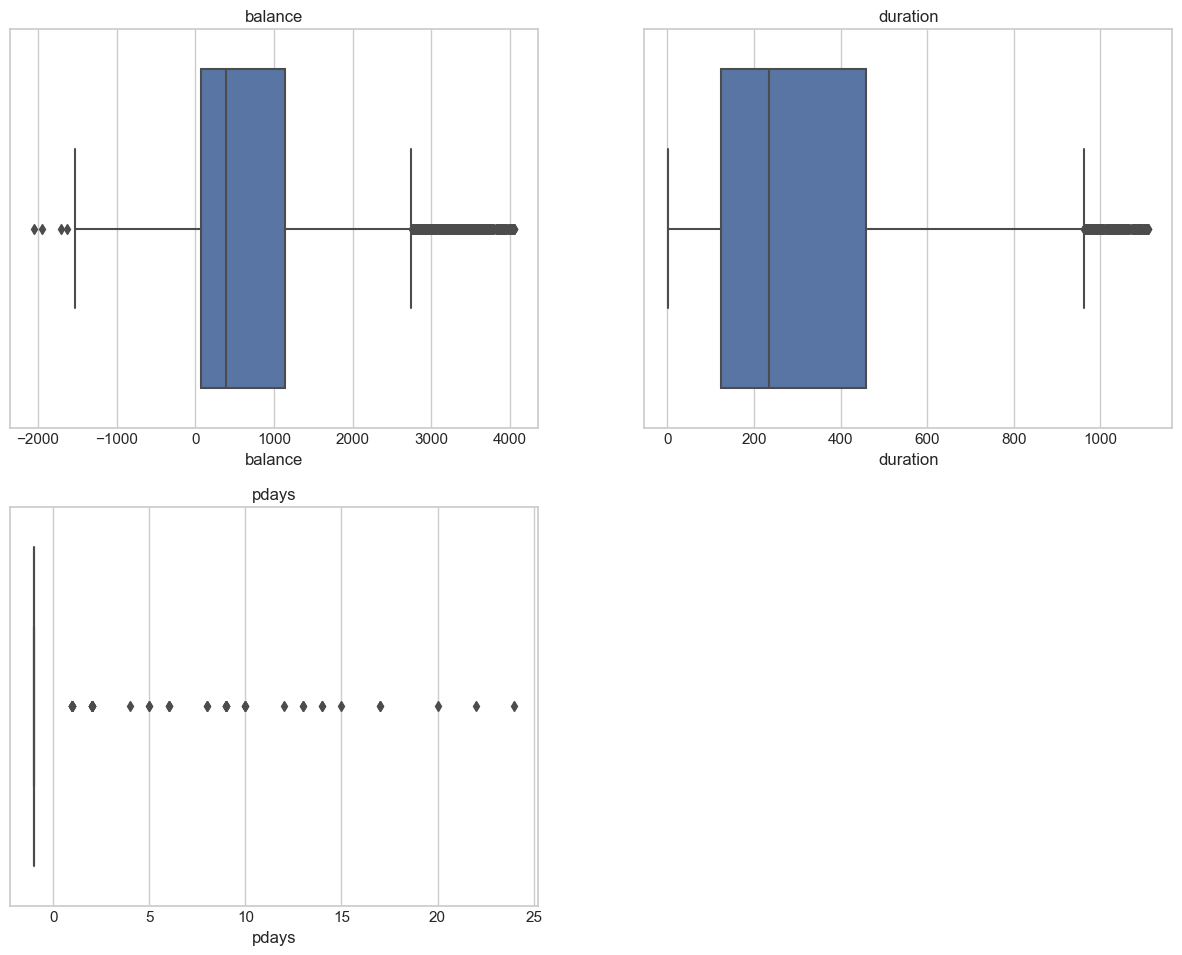

In [468]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 30))

# Set seaborn style
sns.set_style("whitegrid")

# Create subplots
ax = plt.subplot(521)
sns.boxplot(x=df_train['balance'], ax=ax)
ax.set_title('balance')

ax = plt.subplot(522)
sns.boxplot(x=df_train['duration'], ax=ax)
ax.set_title('duration')

ax = plt.subplot(523)
sns.boxplot(x=df_train['pdays'], ax=ax)
ax.set_title('pdays')


We have successfully removed some of the outliers

# Classification

In [551]:
# Separate the labels and the features.
train_data = df_train # Make a copy of the training set.
test_data = df_test
print(train_data.shape)
test_data.shape

(5781, 17)


(2233, 16)

In [470]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Code reference Hands on Machine Learning with Scikit Learn and Tensorflow by Aurelien Geron.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=int)
        X_mask = np.ones_like(X, dtype=bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [471]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [472]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Making pipelines
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["age", "balance", "day", "campaign", "pdays", "previous","duration"])),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["job", "education", "marital", "default", "housing", "loan", "month",
                                     "poutcome"])),
    ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))
])

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

In [473]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train
X_test = preprocess_pipeline.fit_transform(test_data)
X_train

array([[-0.32205453,  2.96345824, -0.47140944, ...,  0.        ,
         0.        ,  1.        ],
       [-0.67318796, -0.15362216, -1.64128194, ...,  0.        ,
         0.        ,  1.        ],
       [-1.19988811,  1.45331991,  0.58147581, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.93653804, -0.6498687 ,  1.40038656, ...,  0.        ,
         0.        ,  1.        ],
       [-0.84875468,  2.60273694,  0.46448856, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.11686226,  1.30352886,  0.34750131, ...,  0.        ,
         0.        ,  1.        ]])

In [474]:
y_train = train_data['deposit']
y_test = test_data['deposit']
y_train.shape

(5781,)

In [475]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)
y_train

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

# Using Logistic Regression

In [476]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [477]:
clf = LogisticRegression(C=0.01,multi_class='auto',penalty='l1',solver='liblinear',max_iter=500)
# fit data
clf.fit(X_train, y_train)
# compute accuracy of the prediction
score = clf.score(X_test, y_test)
print("Test score: %.4f" % score)

Test score: 0.7062


### Level of Sparsity

In [478]:
# percentage of zero weights
sparsity = np.mean(clf.coef_ == 0) * 100
print("Sparsity: %.2f%%" % sparsity)

Sparsity: 85.42%


### Histogram of Decision Function Values for each Output Value

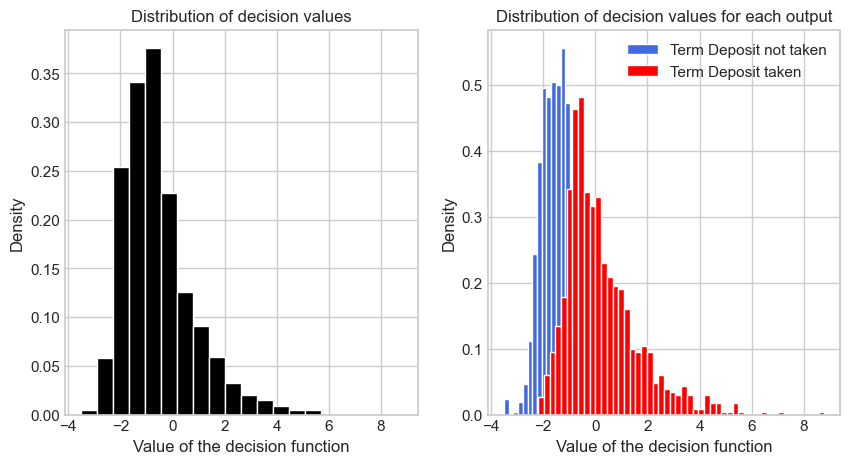

In [479]:
decision_pred_test = clf.decision_function(X_test)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(decision_pred_test,bins=20,color='black',density=True)
plt.xlabel("Value of the decision function")
plt.ylabel("Density")
plt.title('Distribution of decision values')
# we can look at the value for the outputs corresponding to whether the term deposit was taken or not
indices_0 = np.where((y_test == 0))
decision_pred_test_0 = clf.decision_function(X_test[indices_0])
indices_1 = np.where((y_test == 1))
decision_pred_test_1 = clf.decision_function(X_test[indices_1])
plt.subplot(1, 2, 2)
plt.hist(decision_pred_test_0,bins=50,color='royalblue',density=True)
plt.hist(decision_pred_test_1,bins=50,color='red',density=True)
plt.xlabel("Value of the decision function")
plt.ylabel("Density")
plt.legend(['Term Deposit not taken','Term Deposit taken'])
plt.title('Distribution of decision values for each output')
plt.show()

The Output Value of 0 (that is, when the customers did not open term subscriptions) is mostly characterized by negative values of the decision function, while the other one is associated with positive values.

We can also plot the distribution of prediction probabilities. These probabilities give us some indication of the confidence of the prediction.

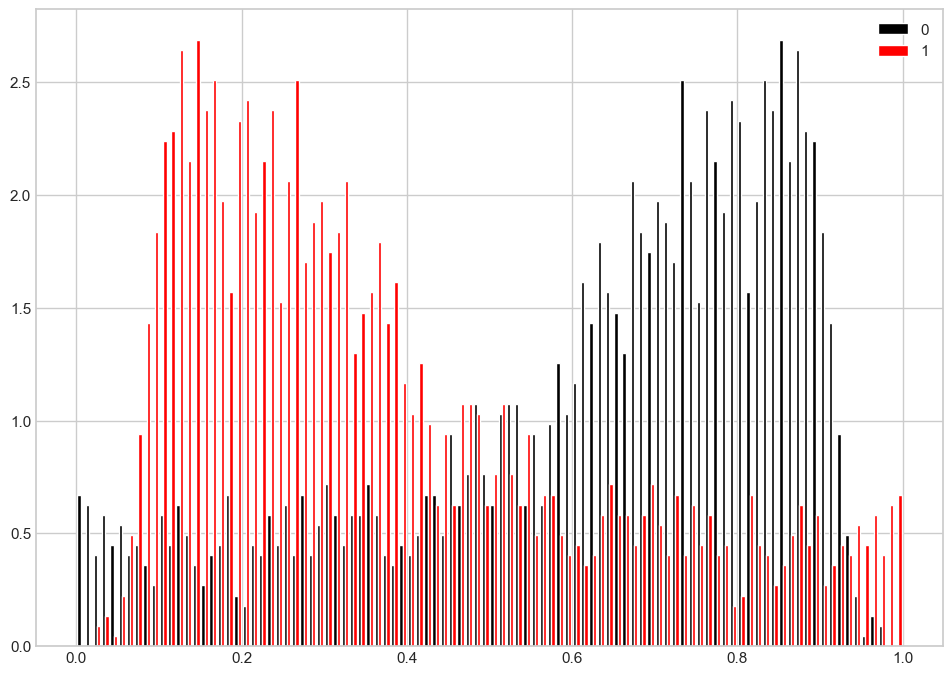

In [480]:
proba_pred_test = clf.predict_proba(X_test)
plt.hist(proba_pred_test,bins=100,color=['black','red'],density=True)
# Equivalent to the following two lines
#plt.hist(proba_pred_test[:,0],bins=100,color=['black'],density=True)
#plt.hist(proba_pred_test[:,1],bins=100,color=['red'],density=True)
plt.legend(clf.classes_)
plt.show()

### Confusion Matrix

In [481]:
from sklearn import metrics
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[1086   96]
 [ 560  491]]



<a id="confusion"></a>
<img src="https://computersciencesource.files.wordpress.com/2010/01/conmat.png">

### Insights of a Confusion Matrix: 
The main purpose of a confusion matrix is to see how our model is performing when it comes to classifying potential clients that are likely to suscribe to a term deposit. We will see in the confusion matrix four terms the True Positives, False Positives, True Negatives and False Negatives.<br><br>

**Positive/Negative:** Type of Class (label) ["No", "Yes"]
**True/False:** Correctly or Incorrectly classified by the model.<br><br>

**True Negatives (Top-Left Square):** This is the number of **correctly** classifications of the "No" class or potenial clients that are **not willing** to suscribe a term deposit. <br><br>

**False Negatives (Top-Right Square):** This is the number of **incorrectly** classifications of the "No" class or potential clients that are **not willing** to suscribe a term depositt. <br><br>

**False Positives (Bottom-Left Square):** This is the number of **incorrectly** classifications of the "Yes" class or potential clients that are **willing** to suscribe a term deposit. <br><br>

**True Positives (Bottom-Right Square):** This is the number of **correctly** classifications of the "Yes" class or potenial clients that are **willing** to suscribe a term deposit.

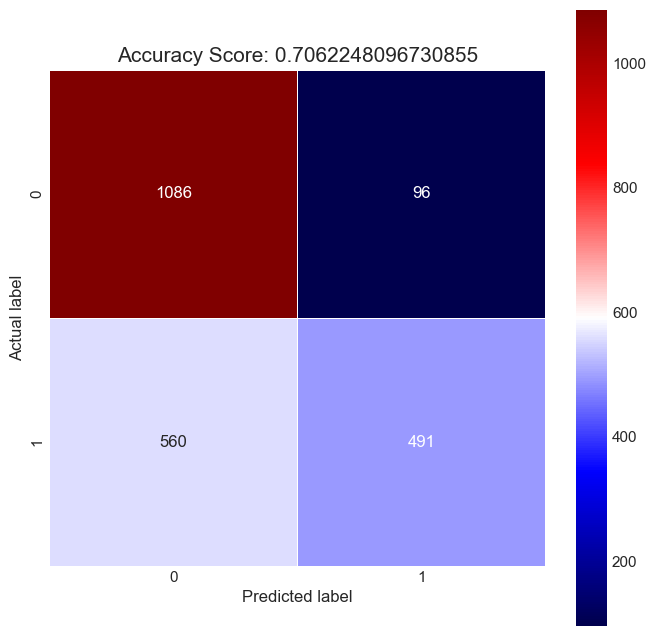

In [482]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'seismic');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Using Cross Validation to find the value of C, penalty and solver

We use GridSearchCV to find the best value of the parameter C for performing Logistic Regression.

In [483]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2']
}

# Create Logistic Regression model
logistic_reg = LogisticRegression(max_iter=500, multi_class='auto')

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_C = best_params['C']
best_solver = best_params['solver']
best_penalty = best_params['penalty']

print("Best hyperparameters:")
print("  - C:", best_C)
print("  - Solver:", best_solver)
print("  - Penalty:", best_penalty)


C:\Users\ayraa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ayraa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ayraa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ayraa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ayraa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ayraa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ayraa\anacond

Best hyperparameters:
  - C: 1
  - Solver: saga
  - Penalty: l2


C:\Users\ayraa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [487]:
# Train the model using the values of the parameters found via cross validation
clf = LogisticRegression(C=1,multi_class='auto',penalty='l2',solver='saga',max_iter=10000)
# fit data
clf.fit(X_train, y_train)
# compute accuracy of the prediction
score = clf.score(X_test, y_test)
print("Test score: %.4f" % score)

Test score: 0.7792


We find that the accuracy here comes out to be more than earlier when the value of C was 0.01 and the penalty and solver were different. Thus performing cross validation indeed gives us a better value of the parameter C, penalty and solver. 

We next perform PCA to check if we get better results.

### Logistic Regression after performing PCA

In [488]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import decomposition
pca = PCA(n_components=48)
pca.fit(X_train)
score_train = pca.transform(X_train)  
score_test = pca.transform(X_test)
clf_PCA = LogisticRegression(C=1,multi_class='auto',penalty='l2',solver='saga',max_iter=10000)
clf_PCA.fit(score_train,y_train)
y_train_PCA = clf_PCA.predict(score_train)
y_test_PCA = clf_PCA.predict(score_test)
print("accuracy (on train data):", metrics.accuracy_score(y_true=y_train,y_pred=y_train_PCA))
print("accuracy (on test data) :", metrics.accuracy_score(y_true=y_test,y_pred=y_test_PCA), "\n")

accuracy (on train data): 0.8213111918353226
accuracy (on test data) : 0.780564263322884 



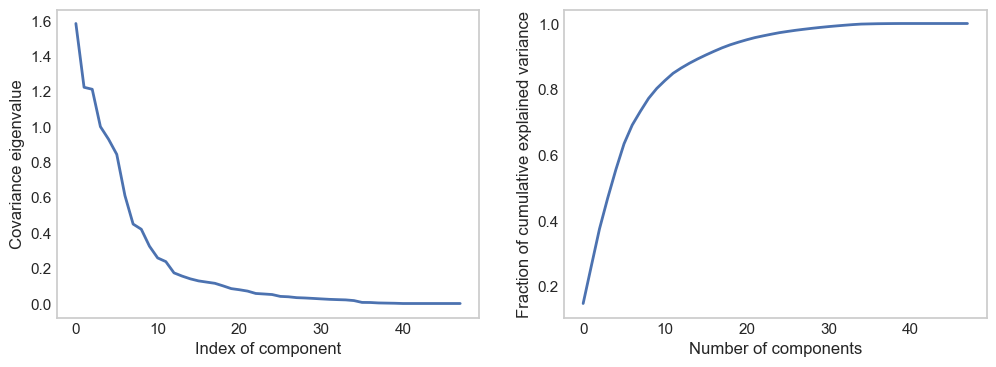

In [489]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 48
pca_data = pca.fit_transform(X_train)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
# Plot the PCA spectrum
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))
ax1.plot(pca.explained_variance_, linewidth=2)
ax1.grid()
ax1.set_xlabel('Index of component')
ax1.set_ylabel('Covariance eigenvalue')
ax2.plot(cum_var_explained, linewidth=2)
ax2.grid()
ax2.set_xlabel('Number of components')
ax2.set_ylabel('Fraction of cumulative explained variance')
plt.show()

In [490]:
def ncomp_var(perc):
    ncomps = len(cum_var_explained[cum_var_explained <= perc + 0.01])
    return ncomps
print(ncomp_var(0.90))

16


As we can see, with just 16 components the variance explained is around 90%. Thus instead of taking 48 components we can take 16 components instead.

In [492]:
# final model after performing PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import decomposition
pca = PCA(n_components=16)
pca.fit(X_train)
score_train = pca.transform(X_train)  
score_test = pca.transform(X_test)
clf_PCA = LogisticRegression(C=1,multi_class='auto',penalty='l2',solver='saga',max_iter=10000)
clf_PCA.fit(score_train,y_train)
y_train_PCA = clf_PCA.predict(score_train)
y_test_PCA = clf_PCA.predict(score_test)
print("accuracy (on train data):", metrics.accuracy_score(y_true=y_train,y_pred=y_train_PCA))
print("accuracy (on test data) :", metrics.accuracy_score(y_true=y_test,y_pred=y_test_PCA), "\n")

accuracy (on train data): 0.7938072997751254
accuracy (on test data) : 0.716524854455889 



We can observe that the accuracy remains almost the same even if we take 16 components instead of 48.

Let us finally check the level of sparsity now after performing PCA.

In [493]:
# percentage of zero weights
sparsity = np.mean(clf_PCA.coef_ == 0) * 100
print("Sparsity: %.2f%%" % sparsity)

Sparsity: 0.00%


In conclusion, the sparsity decreases to 0% after performing PCA in logistic regression which suggests that PCA has transformed the data in a way that the majority of zero-valued elements have been replaced by non-zero values, likely due to dimensionality reduction and feature transformation.

### Precision and Recall:
<a id="precision_recall"></a>
**Recall:** Is the total number of "Yes" in the label column of the dataset. So how many "Yes" labels does our model detect. <br><br>
**Precision:** Means how sure is the prediction of our model that the actual label is a "Yes".

### Recall Precision Tradeoff:
As the precision gets higher the recall gets lower and vice versa. For instance, if we increase the precision from 30% to 60% the model is picking the predictions that the model believes is 60% sure. If there is an instance where the model believes that is 58% likely to be a potential client that will suscribe to a term deposit then the model will classify it as a **"No."** However, that instance was actually a **"Yes"** (potential client did suscribe to a term deposit.) That is why the higher the precision the more likely the model is to miss instances that are actually a **"Yes"!**

In [494]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
print('Precision Score: ', precision_score(y_test, clf.predict(X_test)))
print('Recall Score: ', recall_score(y_test, clf.predict(X_test)))

Precision Score:  0.837772397094431
Recall Score:  0.6584205518553758


### ROC Curve (Receiver Operating Characteristic):
The **ROC curve** tells us how well our classifier is classifying between term deposit suscriptions (True Positives) and non-term deposit suscriptions. The **X-axis** is represented by False positive rates (Specificity) and the **Y-axis** is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.


In [498]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Logistic Regression Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 89.65% \n (Not the best score)', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    

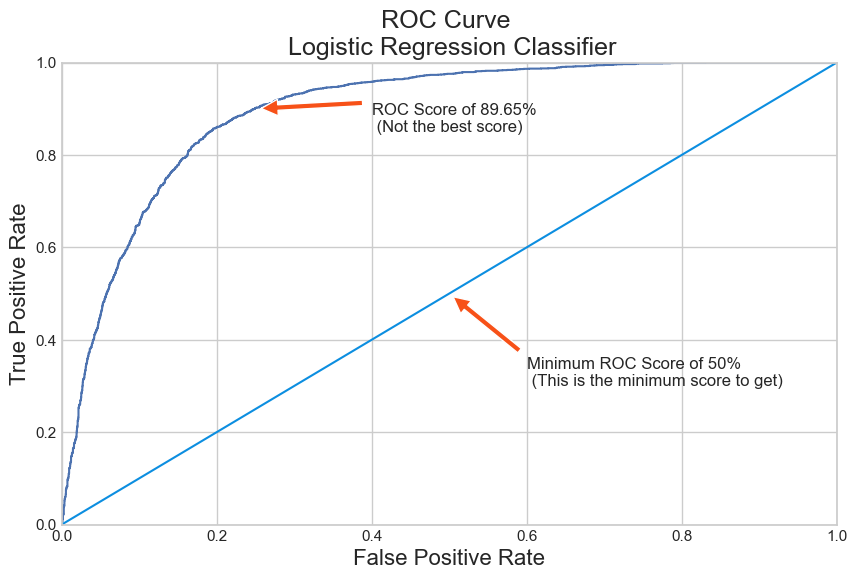

In [499]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(clf, X_train, y_train, cv=3, method="decision_function")
# Logistic Regression Classifier
logreg_fpr, logreg_tpr, threshold = roc_curve(y_train, y_scores)
graph_roc_curve(logreg_fpr, logreg_tpr, threshold)
plt.show()

From the ROC curve we can infer that our logistic model has classified the prospective individuals who made deposit correctly rather than predicting false positive. The more the ROC curve lies towards the top left side the better our model is. We can choose any value between 0.8 to 0.9 for the threshold value which can reap us true positive results

In [497]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression Classifier Score: ', roc_auc_score(y_train, y_scores))

Logistic Regression Classifier Score:  0.8965378721569252


In [500]:
# Let's see what does our classifier predicts.
clf.predict([X_train[1327]]) # some random instance

array([0], dtype=int64)

In [501]:
y_train[1327]

0

# Using Support Vector Machines

In [502]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# set up the random number generator: given seed for reproducibility, None otherwise
# (see https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng)
my_seed = 1
rng = np.random.default_rng(seed=my_seed) 

### Training SVM on this database

The parameter C is in factor of the penalty term arising from misclassification. A large value of C aims at classifying all training examples correctly. Various kernels can be used: "linear" (default choice), "rbf" (Gaussians), "poly" (polynomials), "sigmoid". Custom kernels could also be defined.

In [503]:
from sklearn import svm
from sklearn.metrics import accuracy_score

We start by using SVM with some parameters set to default values.

In [504]:
# for train data
indices_train = np.where((y_train == 0)|(y_train == 1))
print('Shape of train data: ',X_train.shape)
print('Shape of train labels:',y_train.shape)

# same for test
indices_test = np.where((y_test == 0)|(y_test == 1))
print('Shape of test data: ',X_test.shape)
print('Shape of test labels:',y_test.shape)

Shape of train data:  (5781, 48)
Shape of train labels: (5781,)
Shape of test data:  (2233, 48)
Shape of test labels: (2233,)


In [505]:
binary_classifier = svm.SVC()
C_values = np.logspace(-1, 4, 6)

train_accuracy = []
test_accuracy = []

for C_chosen in C_values:
    # construct the classifier with given value of C and fit it
    binary_classifier = svm.SVC(C=C_chosen)
    binary_classifier.fit(X_train,y_train)
    # compute the training error for the 0-1 loss
    y_pred = binary_classifier.predict(X_train)
    train_score = accuracy_score(y_true=y_train, y_pred=y_pred)
    train_accuracy.append(train_score)
    # compute the validation error for the 0-1 loss
    y_pred = binary_classifier.predict(X_test[indices_test])
    y_true = y_test[indices_test]
    test_score = accuracy_score(y_true=y_true, y_pred=y_pred)
    test_accuracy.append(test_score)
    print('C =',C_chosen,': test accuracy =',test_score)

C = 0.1 : test accuracy = 0.7478728168383341
C = 1.0 : test accuracy = 0.7980295566502463
C = 10.0 : test accuracy = 0.7926556202418271
C = 100.0 : test accuracy = 0.7756381549484997
C = 1000.0 : test accuracy = 0.7514554411106136
C = 10000.0 : test accuracy = 0.7438423645320197


The best value of C for kernel="rbf"(default) turns out to be 1.

We can plot the test accuracy as a function of the value of $C$ (at this stage we are not choosing the value of $C$, as this would require performing some cross validation with the training set).

C:\Users\ayraa\AppData\Local\Temp\ipykernel_28024\3898351849.py:2: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "-gD" (-> color='g'). The keyword argument will take precedence.



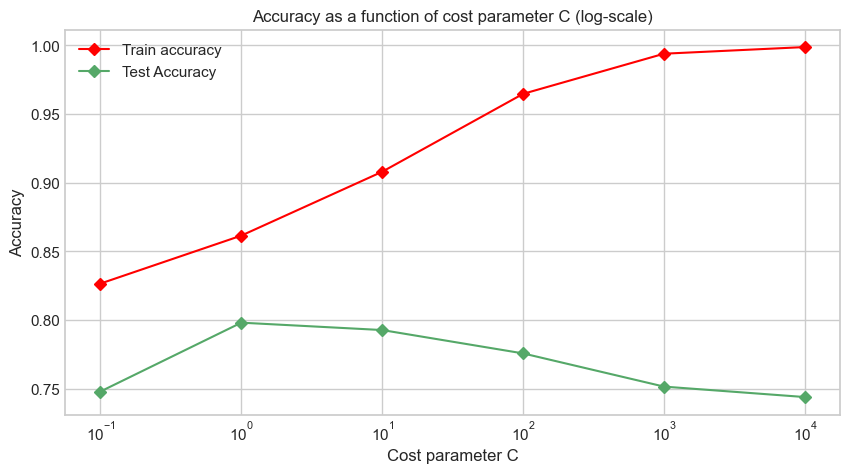

In [506]:
plt.figure(figsize=(10, 5))
plt.semilogx(C_values, train_accuracy,'-gD' ,color='red' , label="Train accuracy")
plt.semilogx(C_values, test_accuracy,'-gD' , label="Test Accuracy")
plt.grid(True)
plt.xlabel("Cost parameter C")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy as a function of cost parameter C (log-scale)')
plt.show()

### Understanding and visualizing what SVM does

We also have a closer look at the outputs for a given value of $C$, in particular the various coefficients, in order to understand the decision function. We consider the case of a linear kernel, which leads to more interpretable results.

In [507]:
binary_classifier = svm.SVC(C=10,kernel="linear")
binary_classifier.fit(X_train,y_train)

SVC(C=10, kernel='linear')

### Confusion Matrix and Accuracy

In [508]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# computing the accuracy
indices_test = np.where((y_test == 0)|(y_test == 1))
y_pred = binary_classifier.predict(X_test[indices_test])
y_true = y_test[indices_test]
print("Accuracy:", metrics.accuracy_score(y_true=y_true, y_pred=y_pred), "\n")

# computing the confusion matrix
# see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
conf_mat = confusion_matrix(y_true,y_pred) 
print("Confusion matrix\n",conf_mat,"\n")

Accuracy: 0.7948947604120018 

Confusion matrix
 [[1023  159]
 [ 299  752]] 



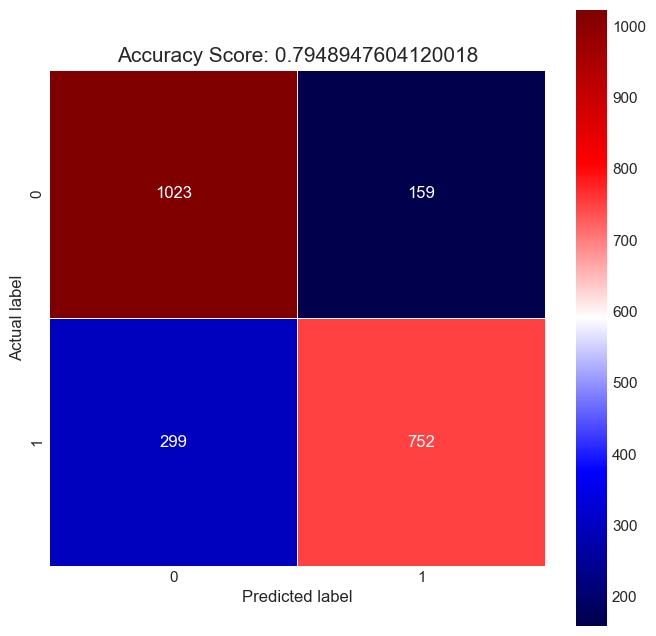

In [510]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'seismic');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: 0.7948947604120018'.format(score)
plt.title(all_sample_title, size = 15);

We next have a closer look at the values of the decision function
### Histogram of Decision Function Values for each Output Value

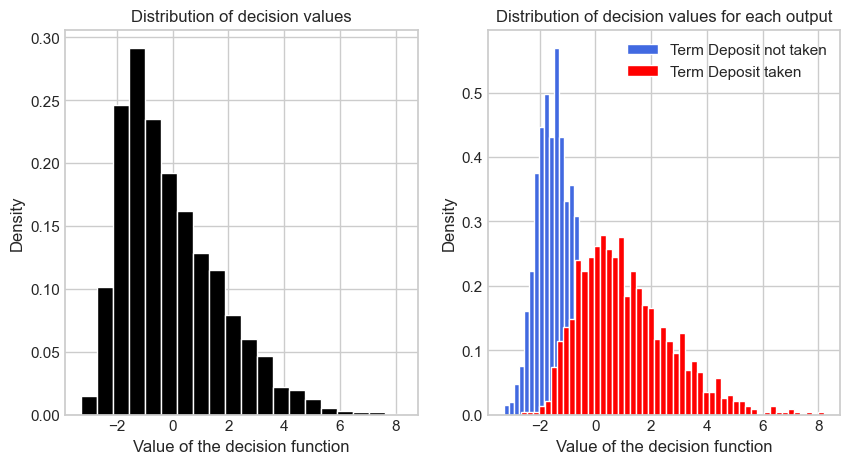

In [511]:
decision_pred_test = binary_classifier.decision_function(X_test)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(decision_pred_test,bins=20,color='black',density=True)
plt.xlabel("Value of the decision function")
plt.ylabel("Density")
plt.title('Distribution of decision values')
# we can look at the value for the  corresponding to outputs 0 and 1, respectively
decision_pred_test_0 = decision_pred_test[np.where(y_test == 0)]
decision_pred_test_1 = decision_pred_test[np.where(y_test == 1)]
plt.subplot(1, 2, 2)
plt.hist(decision_pred_test_0,bins=50,color='royalblue',density=True)
plt.hist(decision_pred_test_1,bins=50,color='red',density=True)
plt.xlabel("Value of the decision function")
plt.ylabel("Density")
plt.legend(['Term Deposit not taken','Term Deposit taken'])
plt.title('Distribution of decision values for each output')
plt.show()

We next investigate the support vectors.

In [512]:
print('Number of support vectors for each class:')
print(' - for',0,': ',binary_classifier.n_support_[0]) 
print(' - for',1,': ',binary_classifier.n_support_[1],'\n')
indices = binary_classifier.support_# (indices of the support vectors)
decision_values = binary_classifier.decision_function(binary_classifier.support_vectors_) # (values of the decision function for the support vectors)
print('Some support vectors')

num_samples_to_print = 5  # Number of support vectors to print
for i in range(min(num_samples_to_print, len(indices))):
    idx = indices[i]
    decision_value = decision_values[i]
    print(f'Support vector {i + 1}: Index {idx}, Decision value {decision_value}')


Number of support vectors for each class:
 - for 0 :  1208
 - for 1 :  1212 

Some support vectors
Support vector 1: Index 3, Decision value -0.16313408233226323
Support vector 2: Index 6, Decision value -0.015772746079918076
Support vector 3: Index 8, Decision value -0.24646419586719948
Support vector 4: Index 15, Decision value -0.24637091781941944
Support vector 5: Index 16, Decision value 0.41943970706831013


### Performing SVM after a PCA

We next perform a PCA, to reduce the dimensionality of the inputs to seven variables, and then perform SVM in this reduced space.  One can however increase the number of retained PCA dimensions until the accuracy on the predictions is nearly as good as with the full features.`

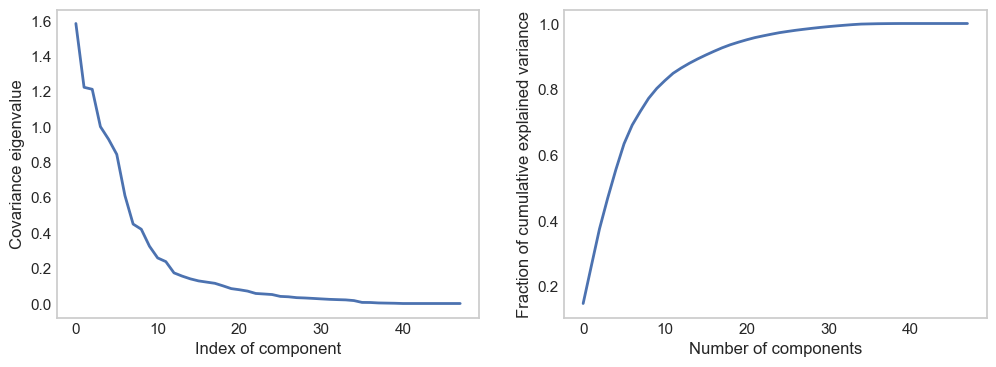

In [513]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 48
pca_data = pca.fit_transform(X_train)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
# Plot the PCA spectrum
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))
ax1.plot(pca.explained_variance_, linewidth=2)
ax1.grid()
ax1.set_xlabel('Index of component')
ax1.set_ylabel('Covariance eigenvalue')
ax2.plot(cum_var_explained, linewidth=2)
ax2.grid()
ax2.set_xlabel('Number of components')
ax2.set_ylabel('Fraction of cumulative explained variance')
plt.show()

We transform both outputs into 3 dimensional vectors for plotting, by keeping some PCA components.

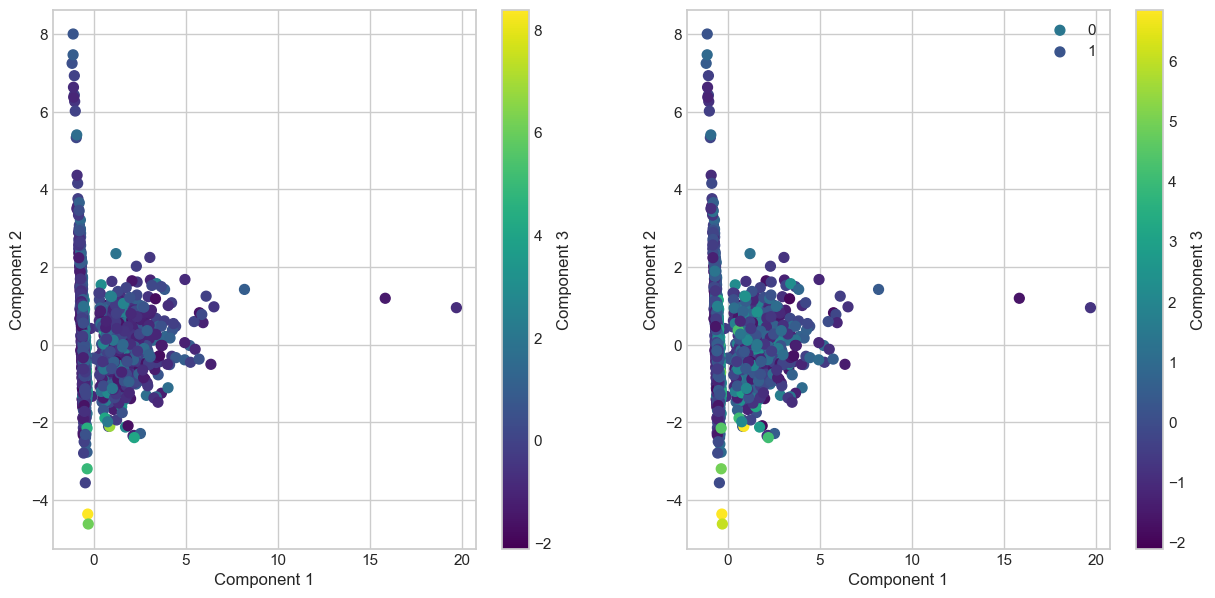

In [514]:
# indices of PCA components to plot
pca = PCA(n_components=3)
component_1 = 0
component_2 = 1
component_3 = 2

pca.fit(X_train)
score_train = pca.transform(X_train)  
score_test = pca.transform(X_test) 

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.scatter(score_test[:, component_1], score_test[:, component_2], c=score_test[:, component_3], cmap='viridis', s=50)
plt.colorbar(label='Component 3')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.subplot(1, 2, 2)
score_test_0 = score_test[y_test == 0] 
score_test_1 = score_test[y_test == 1]
plt.scatter(score_test_0[:, component_1], score_test_0[:, component_2], c=score_test_0[:, component_3], cmap='viridis', s=50)
plt.scatter(score_test_1[:, component_1], score_test_1[:, component_2], c=score_test_1[:, component_3], cmap='viridis', s=50)
plt.colorbar(label='Component 3')
plt.legend(['0', '1'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


In [515]:
binary_classifier_PCA = svm.SVC(C=1,kernel="linear")
binary_classifier_PCA.fit(score_train,y_train)
y_train_PCA = binary_classifier_PCA.predict(score_train)
y_test_PCA = binary_classifier_PCA.predict(score_test)
print("accuracy (on train data):", metrics.accuracy_score(y_true=y_train,y_pred=y_train_PCA))
print("accuracy (on test data) :", metrics.accuracy_score(y_true=y_test,y_pred=y_test_PCA), "\n")

accuracy (on train data): 0.7021276595744681
accuracy (on test data) : 0.6184505150022391 



As we observe the accuracy decreases significantly if we restrict to just 3 components. Let us take 16 components instead. Since we have already established earlier that taking 16 components explains almost 90% of the variance.

In [516]:
pca = PCA(n_components=16)
pca.fit(X_train)
score_train = pca.transform(X_train)  
score_test = pca.transform(X_test)
binary_classifier_PCA = svm.SVC(C=1,kernel="linear")
binary_classifier_PCA.fit(score_train,y_train)
y_train_PCA = binary_classifier_PCA.predict(score_train)
y_test_PCA = binary_classifier_PCA.predict(score_test)
print("accuracy (on train data):", metrics.accuracy_score(y_true=y_train,y_pred=y_train_PCA))
print("accuracy (on test data) :", metrics.accuracy_score(y_true=y_test,y_pred=y_test_PCA), "\n")

accuracy (on train data): 0.7960560456668396
accuracy (on test data) : 0.7174205105239588 



The accuracy here is quite better than the one obtained before.

Let us now consider the "rbf" kernel.

In [517]:
pca = PCA(n_components=16)
pca.fit(X_train)
score_train = pca.transform(X_train)  
score_test = pca.transform(X_test)
binary_classifier_PCA = svm.SVC(C=1,kernel="rbf")
binary_classifier_PCA.fit(score_train,y_train)
y_train_PCA = binary_classifier_PCA.predict(score_train)
y_test_PCA = binary_classifier_PCA.predict(score_test)
print("accuracy (on train data):", metrics.accuracy_score(y_true=y_train,y_pred=y_train_PCA))
print("accuracy (on test data) :", metrics.accuracy_score(y_true=y_test,y_pred=y_test_PCA), "\n")

accuracy (on train data): 0.8311710776682235
accuracy (on test data) : 0.7577250335871025 



As we can see, the accuracy becomes even better if we consider the "rbf" kernel instead of the "linear" kernel.


Now let us try some other kernels.

In [518]:
pca = PCA(n_components=16)
pca.fit(X_train)
score_train = pca.transform(X_train)  
score_test = pca.transform(X_test)
binary_classifier_PCA = svm.SVC(C=1,kernel="sigmoid")
binary_classifier_PCA.fit(score_train,y_train)
y_train_PCA = binary_classifier_PCA.predict(score_train)
y_test_PCA = binary_classifier_PCA.predict(score_test)
print("accuracy (on train data):", metrics.accuracy_score(y_true=y_train,y_pred=y_train_PCA))
print("accuracy (on test data) :", metrics.accuracy_score(y_true=y_test,y_pred=y_test_PCA), "\n")

accuracy (on train data): 0.710257740875281
accuracy (on test data) : 0.6547245857590686 



In [519]:
pca = PCA(n_components=16)
pca.fit(X_train)
score_train = pca.transform(X_train)  
score_test = pca.transform(X_test)
binary_classifier_PCA = svm.SVC(C=1,kernel="poly")
binary_classifier_PCA.fit(score_train,y_train)
y_train_PCA = binary_classifier_PCA.predict(score_train)
y_test_PCA = binary_classifier_PCA.predict(score_test)
print("accuracy (on train data):", metrics.accuracy_score(y_true=y_train,y_pred=y_train_PCA))
print("accuracy (on test data) :", metrics.accuracy_score(y_true=y_test,y_pred=y_test_PCA), "\n")

accuracy (on train data): 0.8199273482096523
accuracy (on test data) : 0.716077026421854 



We thus conclude that taking the kernel as "rbf" does indeed give us the best accuracy, "linear" and "poly" are slightly worse while "sigmoid" is significantly worse. 

### Using Cross Validation to find the best value of C and kernel
We use GridSearchCV to find the best value of the hyperparameter C and kernel for performing classification using SVM.

In [295]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    
}

# Create SVM model
svc = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)


Best hyperparameters: {'C': 1}


The best value of C turns out to be 1  by using GridSearchCV. We thus take the value of the hyperparameter C as 1 while performing SVM. I have neglected the code for getting the best value of the kernel since the execution time is extremely long and computationally inefficient and expensive. Instead, I have taken the best value of C and executed it with all the kernels in order to get the kernel with the best accuracy.

In [520]:
from sklearn import svm
pca = PCA(n_components=16)
pca.fit(X_train)
score_train = pca.transform(X_train)  
score_test = pca.transform(X_test)
binary_classifier_PCA = svm.SVC(C=1,kernel="rbf")
binary_classifier_PCA.fit(score_train,y_train)
y_train_PCA = binary_classifier_PCA.predict(score_train)
y_test_PCA = binary_classifier_PCA.predict(score_test)
print("accuracy (on train data):", metrics.accuracy_score(y_true=y_train,y_pred=y_train_PCA))
print("accuracy (on test data) :", metrics.accuracy_score(y_true=y_test,y_pred=y_test_PCA), "\n")

accuracy (on train data): 0.8311710776682235
accuracy (on test data) : 0.7581728616211375 



### ROC Curve (Receiver Operating Characteristic):

In [297]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n SVM Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 97.03% \n (Not the best score)', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )

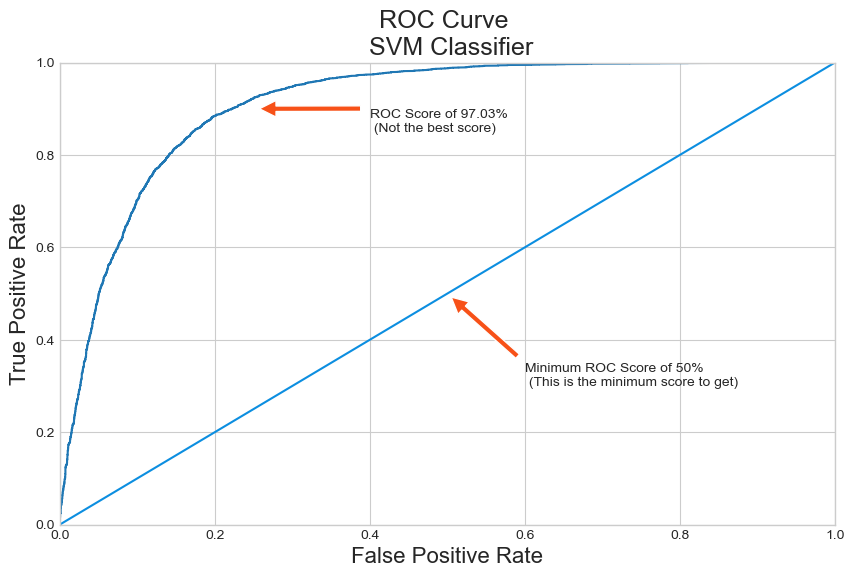

In [298]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(binary_classifier_PCA, X_train, y_train, cv=3, method="decision_function")
# SVM Classifier
svm_fpr, svm_tpr, threshold = roc_curve(y_train, y_scores)
graph_roc_curve(svm_fpr, svm_tpr, threshold)
plt.show()

In [299]:
from sklearn.metrics import roc_auc_score

print('SVM Classifier Score: ', roc_auc_score(y_train_PCA, y_scores))

SVM Classifier Score:  0.9703964032421479


# Using DecisionTree Classifier

In [521]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error


The key parameters to avoid overfitting are
- *max_depth* to limit the maximal depth of the tree
- *min_samples_leaf* to ask for a minimal number of data points for a condition to be satisfied
We start by playing around with a few values of these parameters to get a feeling of what is done/obtained.

In [522]:
# choice of parameters 
chosen_max_depth = 9 
chosen_min_samples_leaf =  10 

# constructing + fitting the model and making the prediction
dt = DecisionTreeClassifier(max_depth=chosen_max_depth, min_samples_leaf=chosen_min_samples_leaf) 
model = dt.fit(X_train,y_train)
y_pred = model.predict(X_test)

# computing the performance on the test set
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1439
           1       0.62      0.81      0.70       794

    accuracy                           0.75      2233
   macro avg       0.75      0.77      0.75      2233
weighted avg       0.78      0.75      0.76      2233



We can visualize the tree that was learnt using the function **plot_tree** (see https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).

Number of data points :  5781
X[ 0 ] =  age
X[ 1 ] =  job
X[ 2 ] =  marital
X[ 3 ] =  education
X[ 4 ] =  default
X[ 5 ] =  balance
X[ 6 ] =  housing
X[ 7 ] =  loan
X[ 8 ] =  day
X[ 9 ] =  month
X[ 10 ] =  duration
X[ 11 ] =  campaign
X[ 12 ] =  pdays
X[ 13 ] =  previous
X[ 14 ] =  poutcome
X[ 15 ] =  deposit
X[ 16 ] =  duration_status


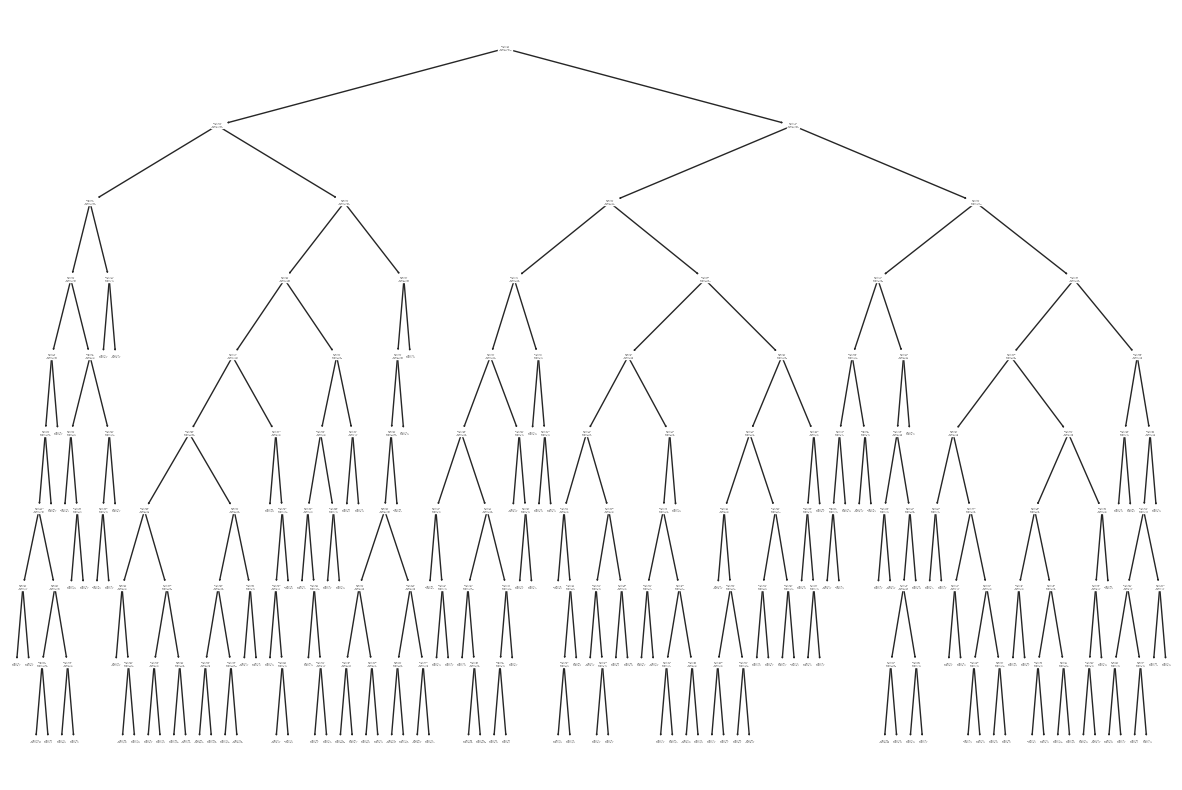

In [523]:
from sklearn import tree
print('Number of data points : ',y_train.shape[0])
for pair in zip(df_train.columns, np.arange(df_train.shape[0])):
  print('X[',pair[1],'] = ', pair[0]) 
plt.figure(figsize=(15, 10))
tree.plot_tree(dt)
plt.show()

We next explore more systematically the choice of the parameters by cross validation.

### Using Cross Validation to find the best value of the parameters

In [524]:
dt = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10),'min_samples_leaf':np.arange(5,20)}

In [525]:
# the output (best parameters) is in the 'dict' format = dictionary
from sklearn.model_selection import GridSearchCV
print('Grid search to find optimal parameters')
gs_dt = GridSearchCV(estimator=dt,param_grid=dt_params) 
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_ # BEST PARAMETERS, see attributes of grid search class
print('- Best maximal depth =',a['max_depth'])
print('- Best minimal number of samples in the leaves = ',a['min_samples_leaf'],'\n')

Grid search to find optimal parameters
- Best maximal depth = 9
- Best minimal number of samples in the leaves =  19 



In [526]:
# training with best parameters
dt_final = DecisionTreeClassifier(max_depth=a['max_depth'], min_samples_leaf=a['min_samples_leaf']) 
model = dt_final.fit(X_train,y_train)
y_pred = model.predict(X_test)

# computing the performance on the test set
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.72      0.79      1421
           1       0.62      0.80      0.70       812

    accuracy                           0.75      2233
   macro avg       0.74      0.76      0.74      2233
weighted avg       0.78      0.75      0.75      2233



Number of data points :  5781
X[ 0 ] =  age
X[ 1 ] =  job
X[ 2 ] =  marital
X[ 3 ] =  education
X[ 4 ] =  default
X[ 5 ] =  balance
X[ 6 ] =  housing
X[ 7 ] =  loan
X[ 8 ] =  day
X[ 9 ] =  month
X[ 10 ] =  duration
X[ 11 ] =  campaign
X[ 12 ] =  pdays
X[ 13 ] =  previous
X[ 14 ] =  poutcome
X[ 15 ] =  deposit
X[ 16 ] =  duration_status


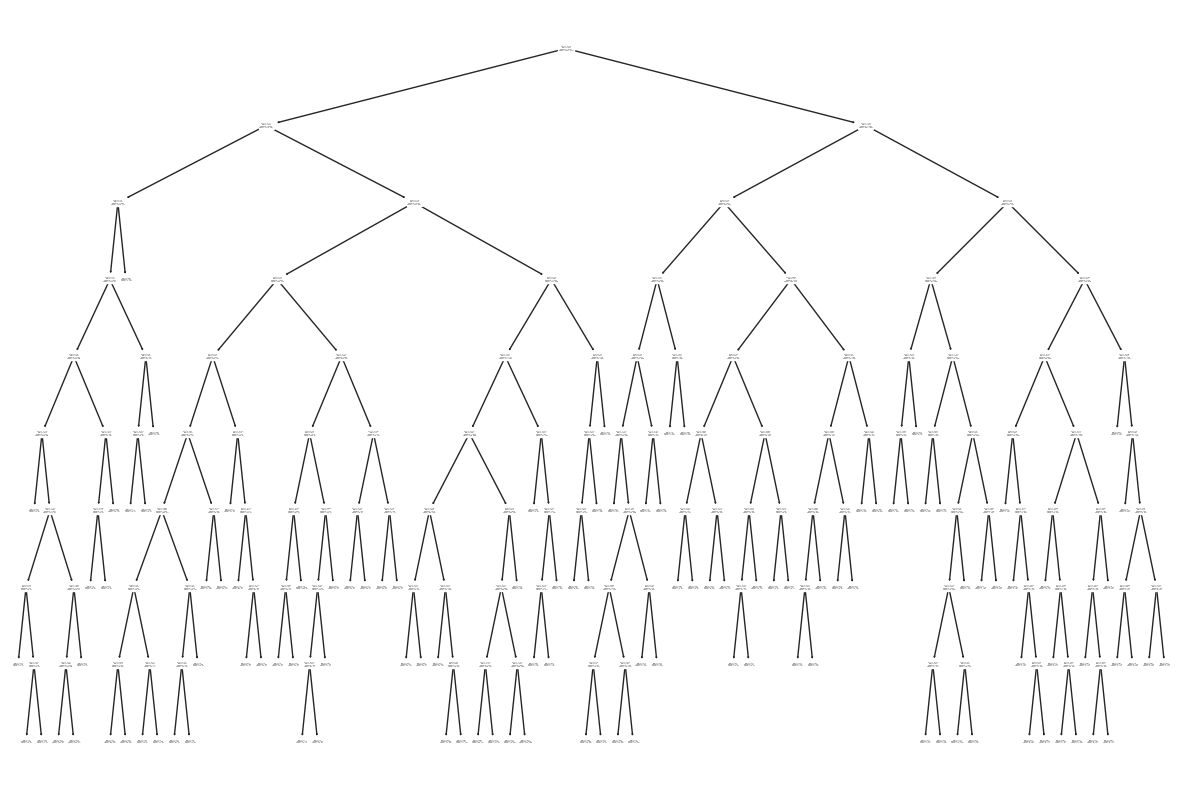

In [527]:
from sklearn import tree
print('Number of data points : ',y_train.shape[0])
for pair in zip(df_train.columns, np.arange(df_train.shape[0])):
  print('X[',pair[1],'] = ', pair[0]) 
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_final)
plt.show()

### Confusion Matrix and Accuracy

In [529]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=9,min_samples_leaf = 19)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))

Test Accuracy:  0.7496641289744738


In [530]:
conf_mat = confusion_matrix(y_test,y_pred) 
print("Confusion matrix\n",conf_mat,"\n")

Confusion matrix
 [[1022  160]
 [ 399  652]] 



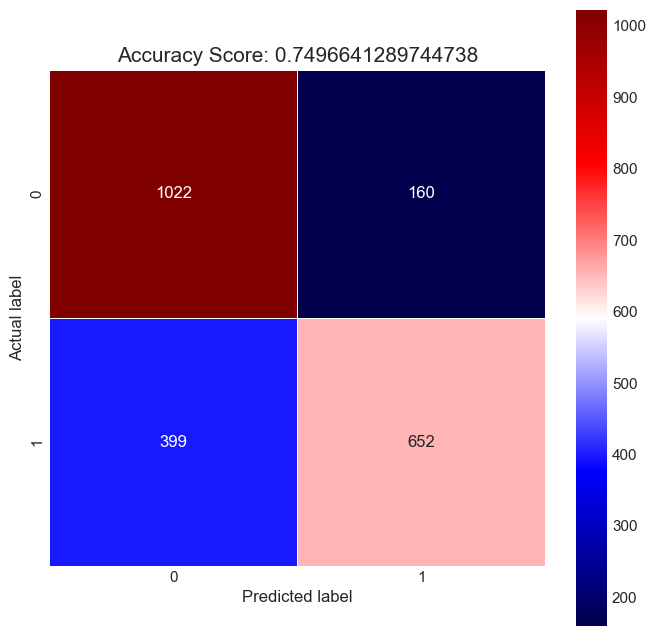

In [532]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'seismic');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: 0.7496641289744738'.format(score)
plt.title(all_sample_title, size = 15);

## Random forests

The test error of decision trees alone is not good. It is much better to combine classification trees into random forest

In [533]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

Here as well, we will find the best parameters for *RandomForestClassifier* by cross validation. The key parameters to set are 
- *n_estimators* which is the number of trees in the forest
- *max_depth* and *min_sample_leaf* which are the same parameters as for decision trees

### Using Cross Validation to find the best parameters

In [534]:
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}
print('Grid search to find optimal parameters')
gs_rf = GridSearchCV(estimator=rf,param_grid=rf_params) 
gs_rf.fit(X_train,y_train)
b = gs_rf.best_params_ #  best parameters
print('- Best number of trees = ',b['n_estimators'])
print('- Best maximal depth =',b['max_depth'])
print('- Best minimal number of samples in the leaves = ',b['min_samples_leaf'],'\n')

Grid search to find optimal parameters
- Best number of trees =  125
- Best maximal depth = 9
- Best minimal number of samples in the leaves =  2 



In [535]:
# fitting the model with best params
RF = RandomForestClassifier(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf']) 
model = RF.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [536]:
# compute the performance on the test set
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1382
           1       0.68      0.83      0.75       851

    accuracy                           0.78      2233
   macro avg       0.78      0.79      0.78      2233
weighted avg       0.80      0.78      0.79      2233



The test accuracy here is higher as compared to the one obtained in the case of a single tree and the recall is also higher. Thus the performance of this model is better.

### Confusion Matrix

In [537]:
conf_mat = confusion_matrix(y_test,y_pred) 
print("Confusion matrix\n",conf_mat,"\n")

Confusion matrix
 [[1041  141]
 [ 341  710]] 



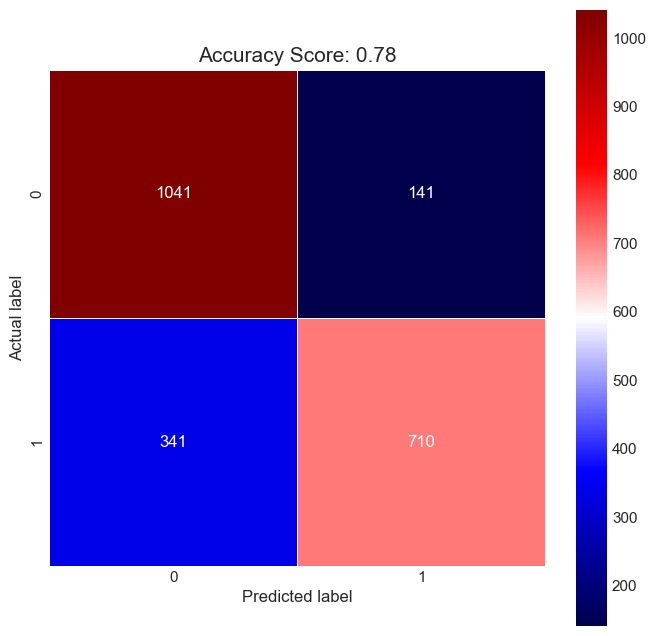

In [539]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'seismic');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: 0.78'.format(score)
plt.title(all_sample_title, size = 15);

As we can see, after implementing the Random Forest Classifier, the False Positives and the False Negatives have both decreased thus increasing the overall accuracy of the model.

### ROC Curve (Receiver Operating Characteristic):

In [543]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n RandomForest Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 90.43% \n (Not the best score)', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )

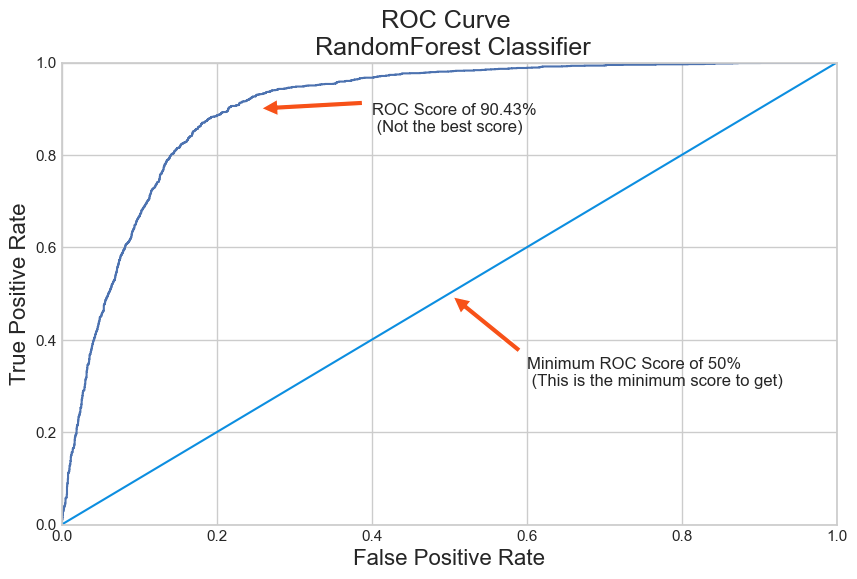

In [544]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(RF, X_train, y_train, cv=3, method="predict_proba")
# RandomForest Classifier
# Get the scores for the positive class
y_scores = y_scores[:, 1]
RF_fpr, RF_tpr, threshold = roc_curve(y_train, y_scores)
graph_roc_curve(RF_fpr, RF_tpr, threshold)
plt.show()

In [542]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

print('RandomForest Classifier Score: ', roc_auc_score(y_train, y_scores))
print(classification_report(y_test,y_pred))

RandomForest Classifier Score:  0.9043240662547775
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      1182
           1       0.83      0.68      0.75      1051

    accuracy                           0.78      2233
   macro avg       0.79      0.78      0.78      2233
weighted avg       0.79      0.78      0.78      2233



# Using Neural Networks

In [545]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras_tuner.tuners import RandomSearch

In [546]:
input_dim = X_train.shape[1]

neurons_l1 = 8
neurons_l2 = 4
epochs = 200
model2 = Sequential()

model2.add(Dense(neurons_l1, input_dim = input_dim, activation = 'relu'))
model2.add(Dense(neurons_l2, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

C:\Users\ayraa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [547]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

In [548]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=epochs, verbose = 1, validation_split=0.3)

Epoch 1/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5527 - loss: 0.6916 - val_accuracy: 0.6438 - val_loss: 0.6217
Epoch 2/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6208 - loss: 0.6060 - val_accuracy: 0.7026 - val_loss: 0.5142
Epoch 3/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7496 - loss: 0.4982 - val_accuracy: 0.8052 - val_loss: 0.4419
Epoch 4/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8089 - loss: 0.4313 - val_accuracy: 0.8202 - val_loss: 0.4046
Epoch 5/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8277 - loss: 0.3905 - val_accuracy: 0.8202 - val_loss: 0.3948
Epoch 6/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8248 - loss: 0.3813 - val_accuracy: 0.8282 - val_loss: 0.3956
Epoch 7/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8214 - loss: 0.3818 - val_accuracy: 0.8225 - val_loss: 0.3944
Epoch 8/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8348 - loss: 0.3750 - val_accu

In [549]:
predictions_nn2 = model2.predict(X_test)
predictions_nn2 = (predictions_nn2>0.5)*1

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [550]:
from sklearn.metrics import f1_score
print("Accuracy score of model2: ",accuracy_score(predictions_nn2,y_test))
print("F1 score of model2: ",f1_score(predictions_nn2,y_test))
print("Recall score of model2: ",recall_score(predictions_nn2,y_test))
print("Precision score of model2: ",precision_score(predictions_nn2,y_test))

Accuracy score of model2:  0.7962382445141066
F1 score of model2:  0.7779404587603709
Recall score of model2:  0.7985971943887775
Precision score of model2:  0.758325404376784
